In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass

In [3]:
df = pd.read_csv("../input/acea-water-prediction/Aquifer_Petrignano.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/acea-water-prediction/Aquifer_Petrignano.csv'

In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('Aquifer_Petrignano.csv')


ModuleNotFoundError: No module named 'google'

In [5]:
import pandas as pd

# Use the full path to read the CSV file
df = pd.read_csv(r"C:\Users\rober ugalde\Documents\4GEEKS ACADEMY___DATA SCIENCE\time series solution\Aquifer_Petrignano.csv")

# Display the first 5 rows
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rober ugalde\\Documents\\4GEEKS ACADEMY___DATA SCIENCE\\time series solution\\Aquifer_Petrignano.csv'

In [1]:
import pandas as pd

# Use the full path to read the CSV file
df = pd.read_csv(r"C:\Users\rober ugalde\Documents\4GEEKS ACADEMY___DATA SCIENCE\time series solution\Aquifer_Petrignano.csv")

# Display the first 5 rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rober ugalde\\Documents\\4GEEKS ACADEMY___DATA SCIENCE\\time series solution\\Aquifer_Petrignano.csv'

In [2]:
import os
import pandas as pd

# Change directory
os.chdir(r"C:\Users\rober ugalde\Documents\4GEEKS ACADEMY___DATA SCIENCE\time series solution")

# Read CSV from current directory
df = pd.read_csv("Aquifer_Petrignano.csv")

# Show first rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rober ugalde\\Documents\\4GEEKS ACADEMY___DATA SCIENCE\\time series solution'

In [3]:
import os
import pandas as pd

# Check if the directory exists
folder_path = r"C:\Users\rober ugalde\Documents\4GEEKS ACADEMY___DATA SCIENCE\time series solution"

if os.path.exists(folder_path):
    os.chdir(folder_path)  # Change directory
    print(f"Directory changed to: {os.getcwd()}")
else:
    print(f"Directory not found: {folder_path}")

# Try reading the CSV if the folder exists
csv_file = "Aquifer_Petrignano.csv"
if os.path.exists(os.path.join(folder_path, csv_file)):
    df = pd.read_csv(csv_file)
    print(df.head())
else:
    print(f"File not found: {csv_file}")


Directory not found: C:\Users\rober ugalde\Documents\4GEEKS ACADEMY___DATA SCIENCE\time series solution
File not found: Aquifer_Petrignano.csv


In [4]:
import os

# List files in Documents folder
path = r"C:\Users\rober ugalde\Documents"
for root, dirs, files in os.walk(path):
    if "Aquifer_Petrignano.csv" in files:
        print(f"Found at: {os.path.join(root, 'Aquifer_Petrignano.csv')}")


In [5]:
import pandas as pd

# Use the full path directly
df = pd.read_csv(r"C:\Users\rober ugalde\Documents\4GEEKS ACADEMY___DATA SCIENCE\time series solution\Aquifer_Petrignano.csv")
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rober ugalde\\Documents\\4GEEKS ACADEMY___DATA SCIENCE\\time series solution\\Aquifer_Petrignano.csv'

In [6]:
import pandas as pd

# Read CSV from the exact path
df = pd.read_csv(r"C:\Users\rober ugalde\Aquifer_Petrignano.csv")

# Show first few rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rober ugalde\\Aquifer_Petrignano.csv'

In [8]:
import pandas as pd

# Read CSV from current workspace directory
df = pd.read_csv("Aquifer_Petrignano.csv")
print(df.head())


         Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                           

In [9]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not useful columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [10]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

date  rainfall  depth_to_groundwater  temperature  drainage_volume  \
0  01/01/2009       0.0                -31.14          5.2       -24530.688   
1  02/01/2009       0.0                -31.11          2.3       -28785.888   
2  03/01/2009       0.0                -31.07          4.4       -25766.208   
3  04/01/2009       0.0                -31.05          0.8       -27919.296   
4  05/01/2009       0.0                -31.01         -1.9       -29854.656   

   river_hydrometry  
0               2.4  
1               2.5  
2               2.4  
3               2.4  
4               2.3

parse the date column

In [12]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color': 'green'})

the target value is the depth to groundwater indicating the level in meters from the ground floor.

/tmp/ipykernel_5779/126358975.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
/tmp/ipykernel_5779/126358975.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
/tmp/ipykernel_5779/126358975.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
/tmp/ipykernel_5779/126358975.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df['date'], y=d

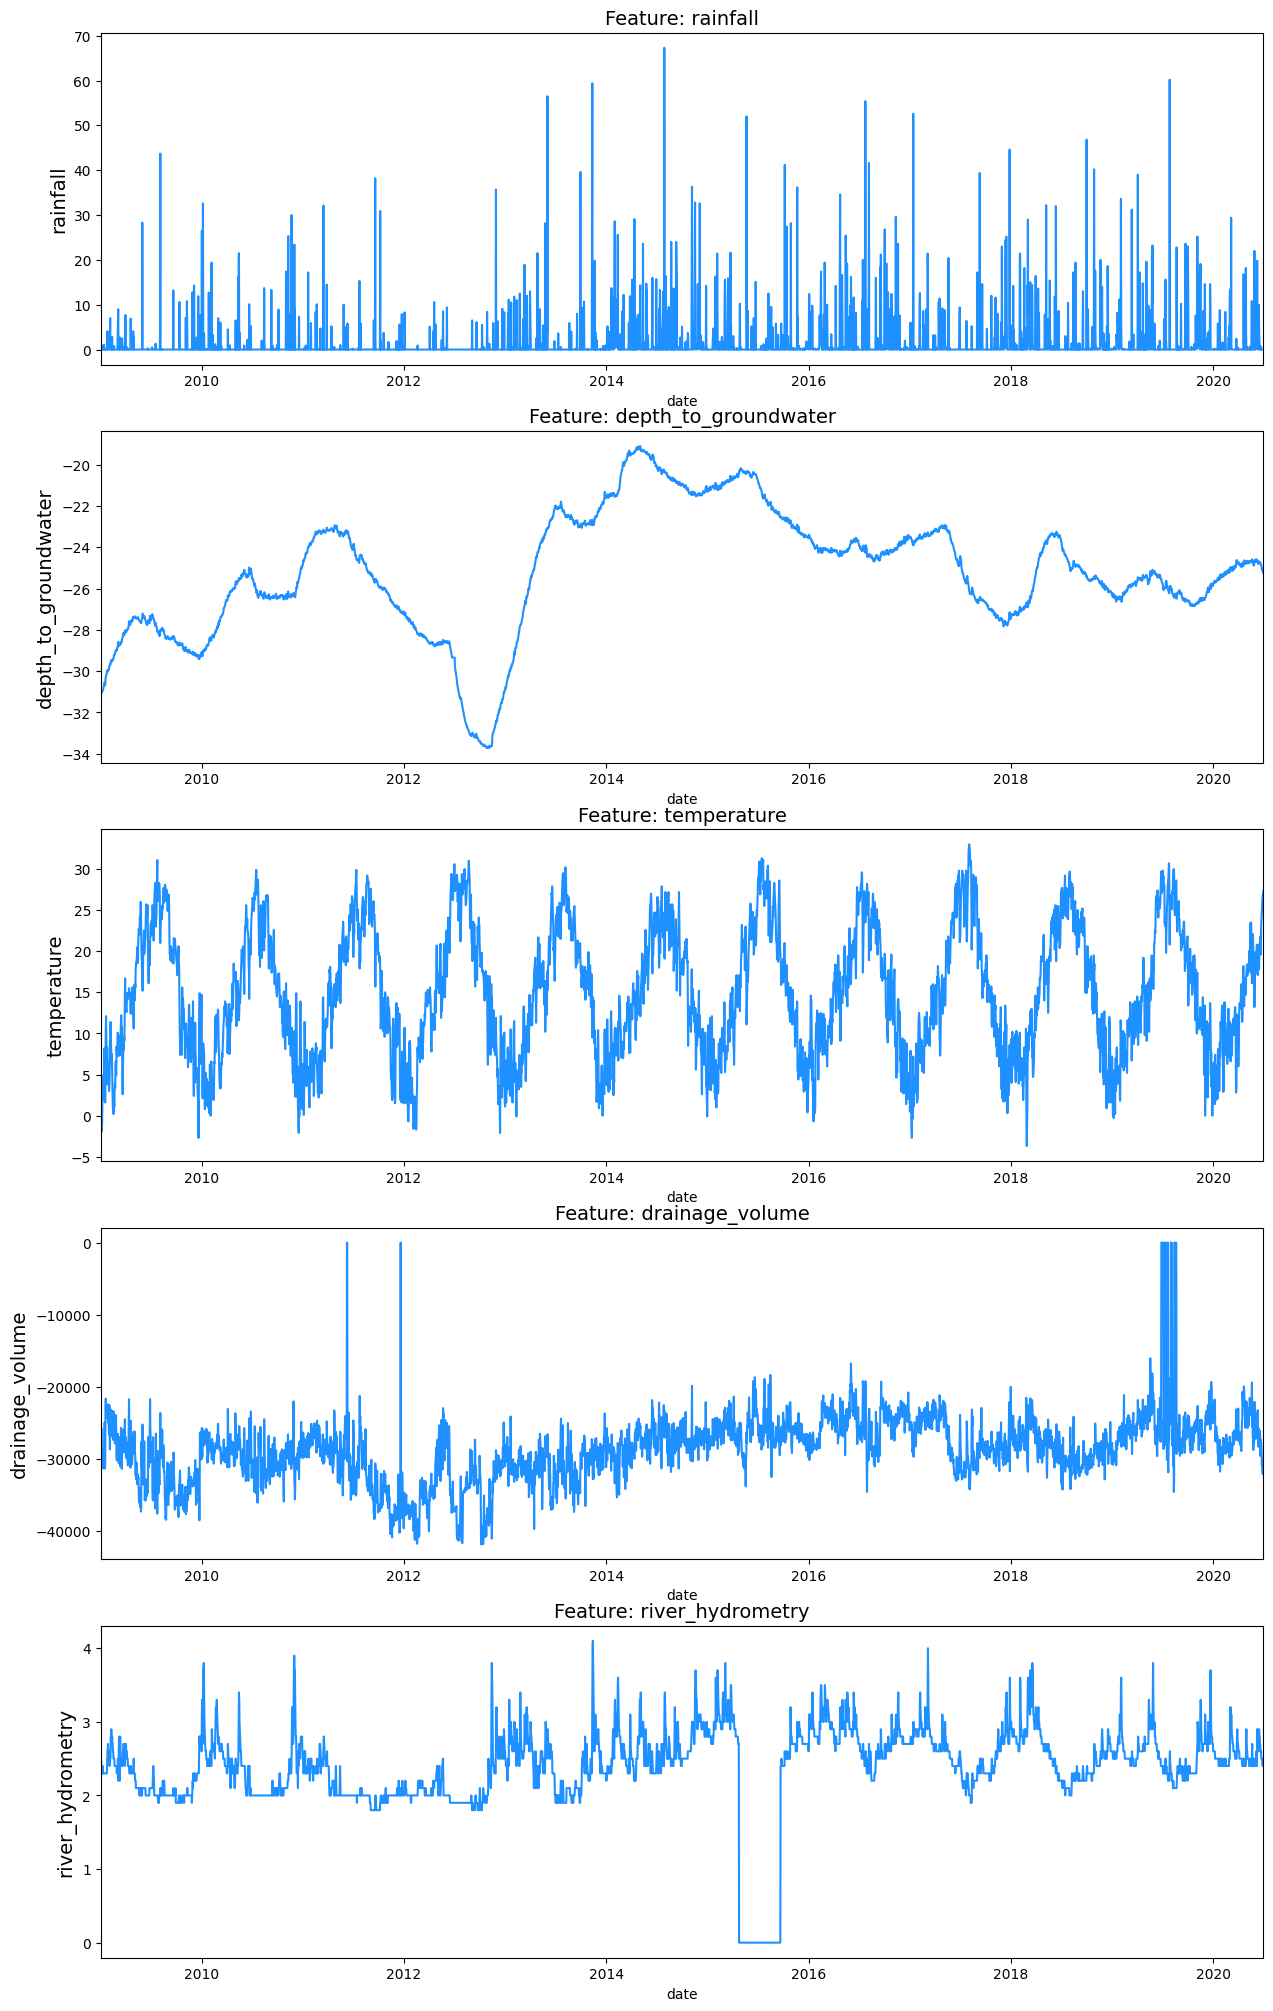

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date




# To complete the data, as naive method, we will use .ffill()
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])                

In [15]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()

date  delta
0 2009-01-01    NaT
1 2009-01-02 1 days
2 2009-01-03 1 days
3 2009-01-04 1 days
4 2009-01-05 1 days

In [16]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4198 days 00:00:00'), np.int64(4198))

In [17]:
df = df.drop('delta', axis=1)
df.isna().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64

NameError: name 'np' is not defined

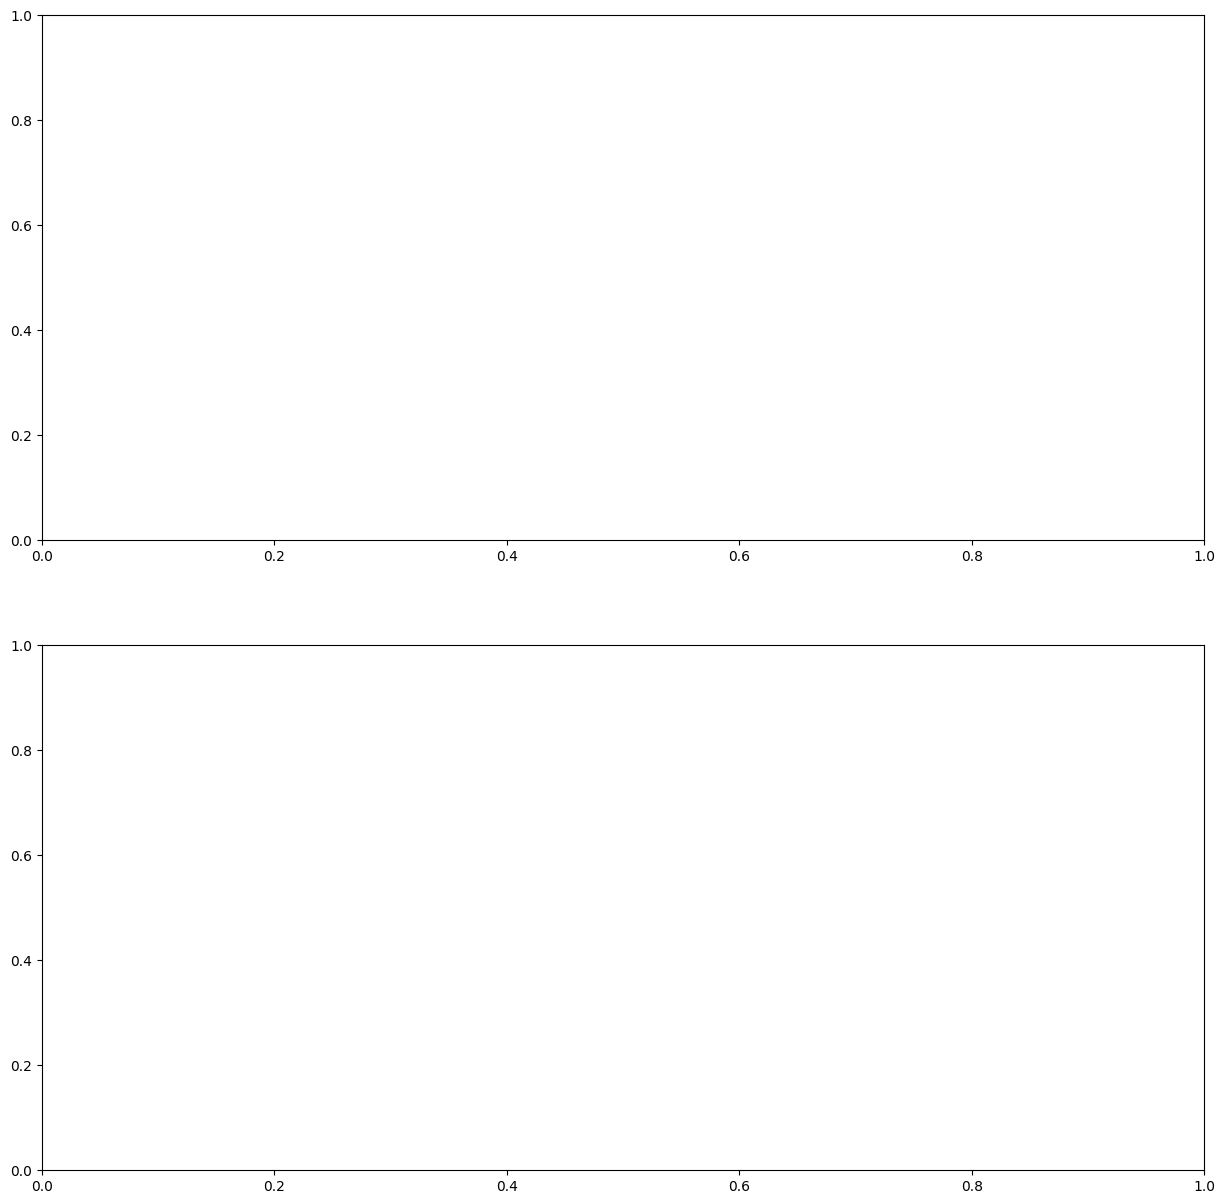

In [18]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

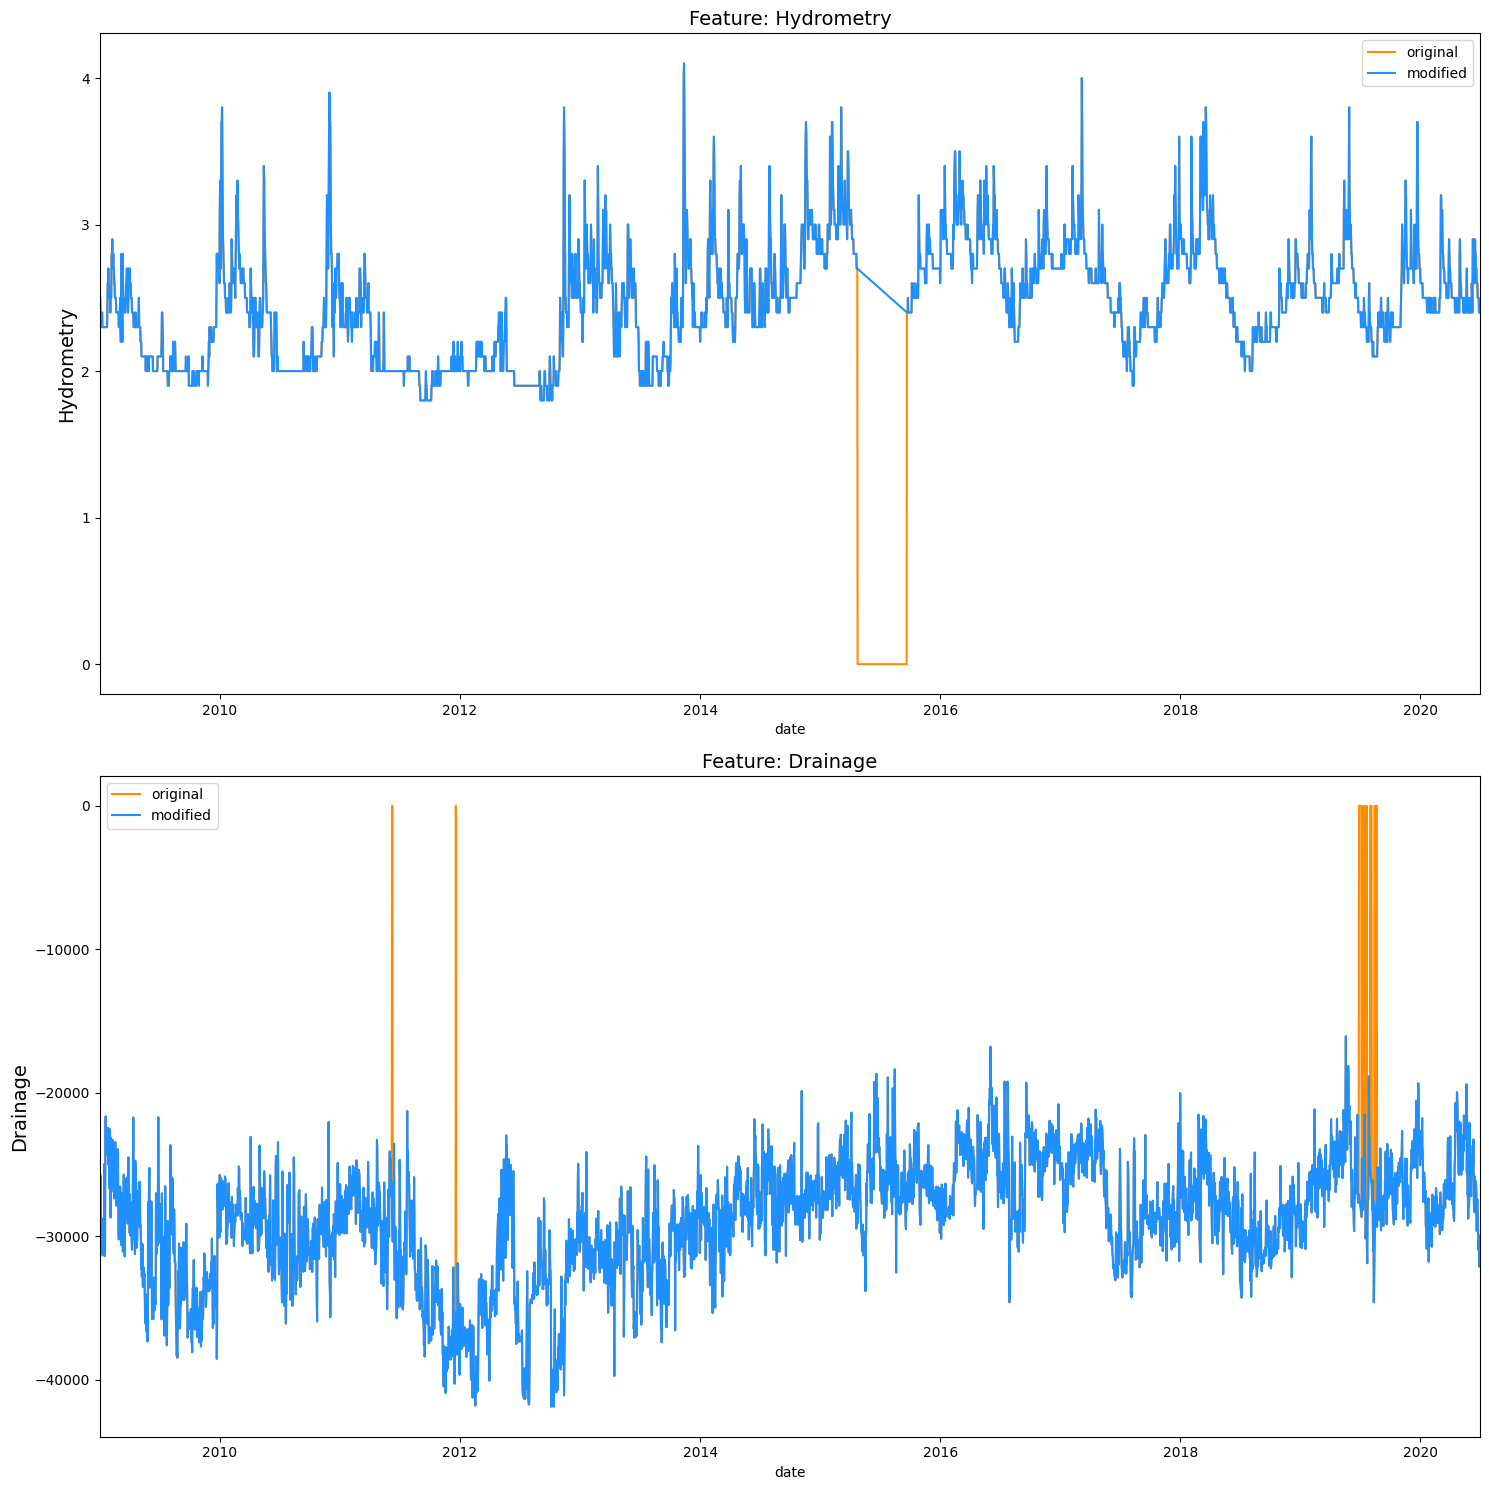

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

# Create subplots
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# Hydrometry plot
old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel('Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Drainage plot
old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel('Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()


AttributeError: 'YTick' object has no attribute 'label'

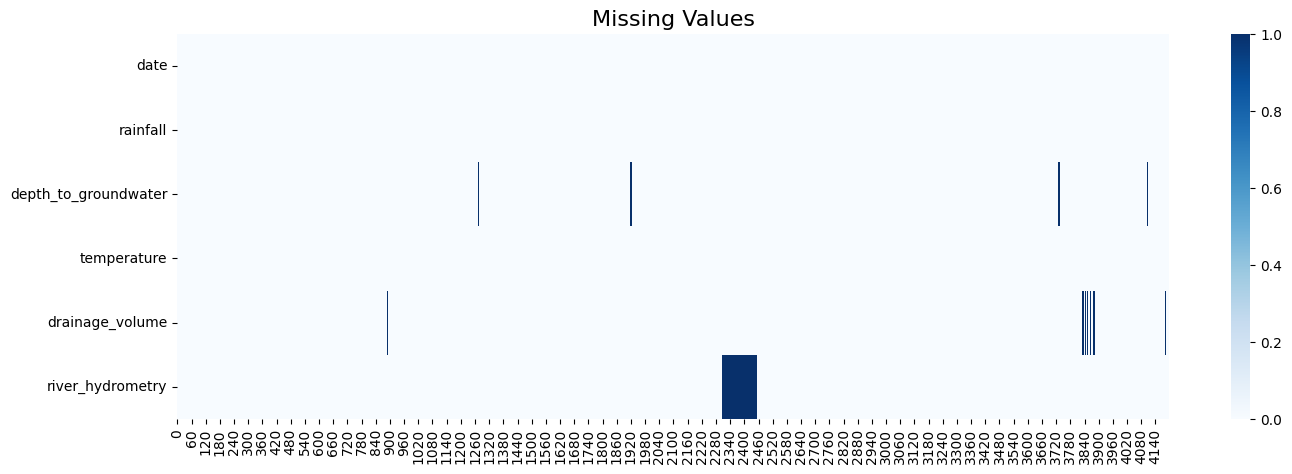

In [20]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

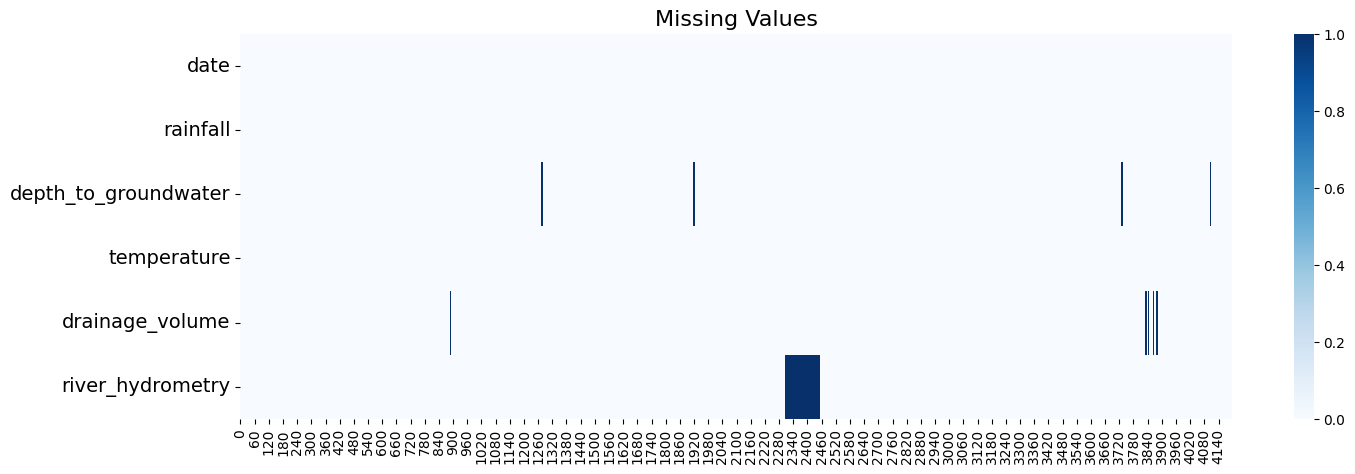

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))

# Heatmap for missing values
sns.heatmap(df.T.isna(), cmap='Blues', ax=ax)
ax.set_title('Missing Values', fontsize=16)

# Adjust y-axis tick label font size
for tick in ax.yaxis.get_major_ticks():
    if tick.label1:  # Use label1 for major ticks
        tick.label1.set_fontsize(14)
    if tick.label2:  # Use label2 for secondary ticks (if any)
        tick.label2.set_fontsize(14)

plt.show()


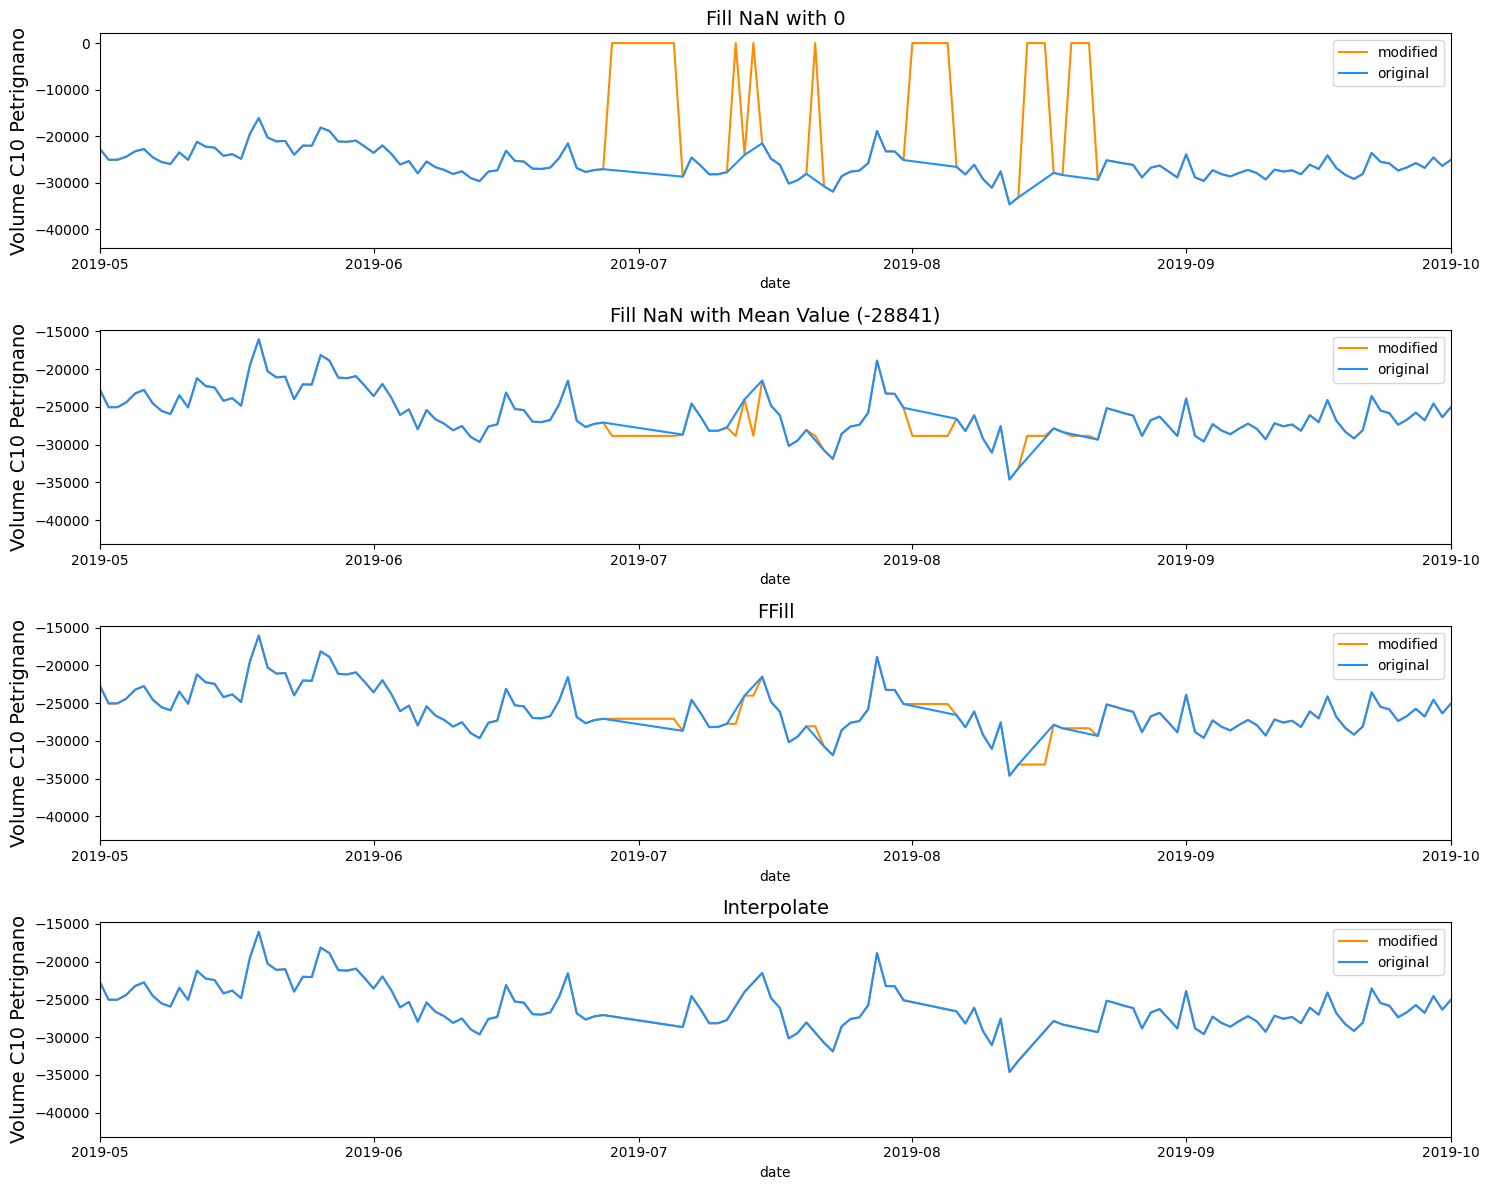

In [22]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = df['drainage_volume'].mean()
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [23]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

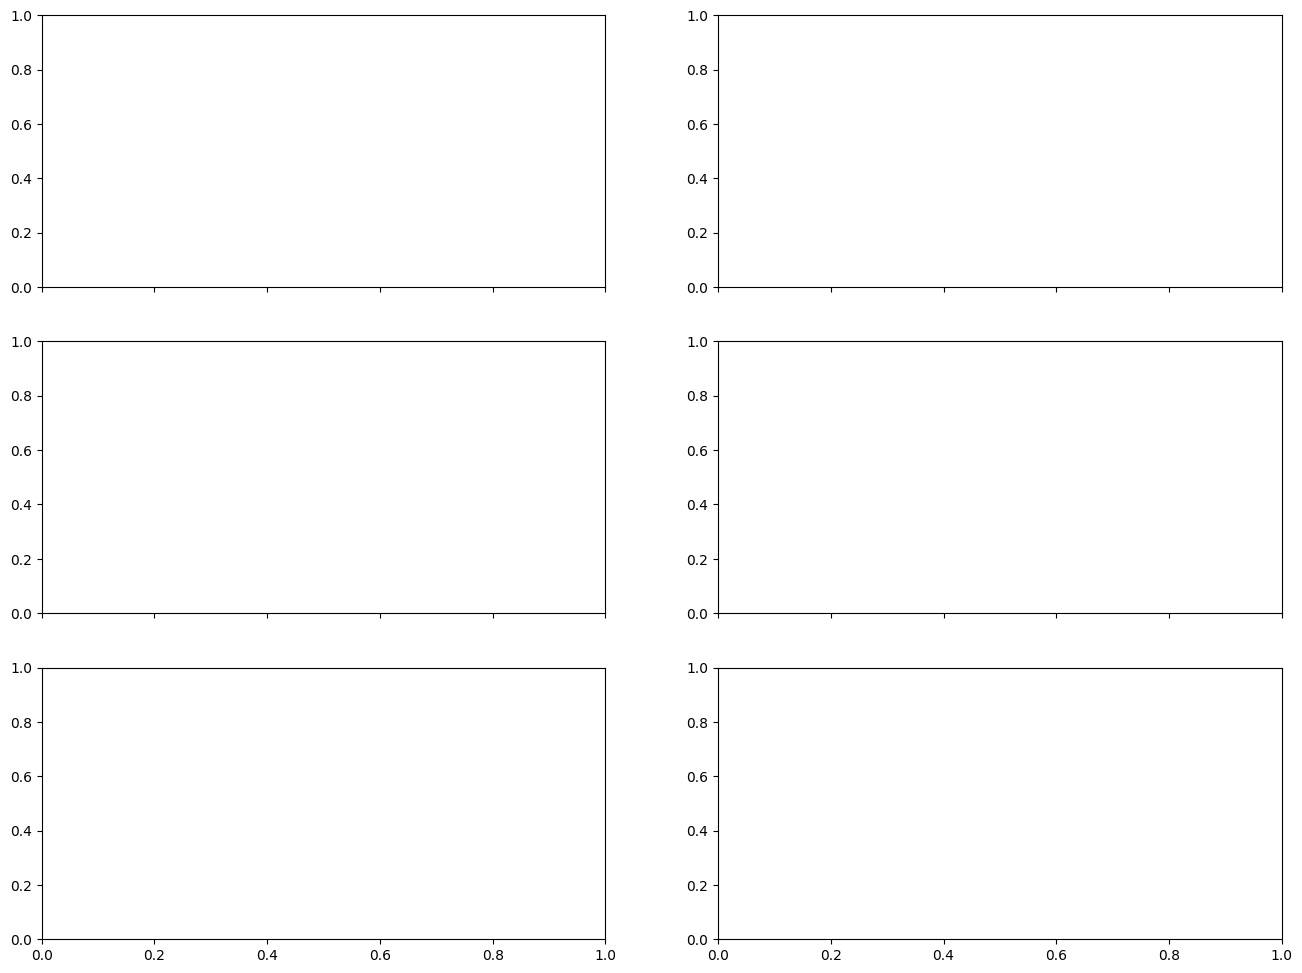

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(df['date'], df['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(df['date'], df['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['temperature'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['temperature'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16, 12))

# Daily Drainage Volume
sns.lineplot(x=df['date'], y=df['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Daily Drainage Volume', fontsize=14)

# Weekly Drainage Volume
resampled_df = df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

# Monthly Drainage Volume
resampled_df = df[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

# Set x-axis limits for drainage
for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Daily Temperature
sns.lineplot(x=df['date'], y=df['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

# Weekly Temperature
resampled_df = df[['date','temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['temperature'], color='dodgerblue


SyntaxError: unterminated string literal (detected at line 32) (4208619431.py, line 32)

/tmp/ipykernel_5779/193479502.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
/tmp/ipykernel_5779/193479502.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)


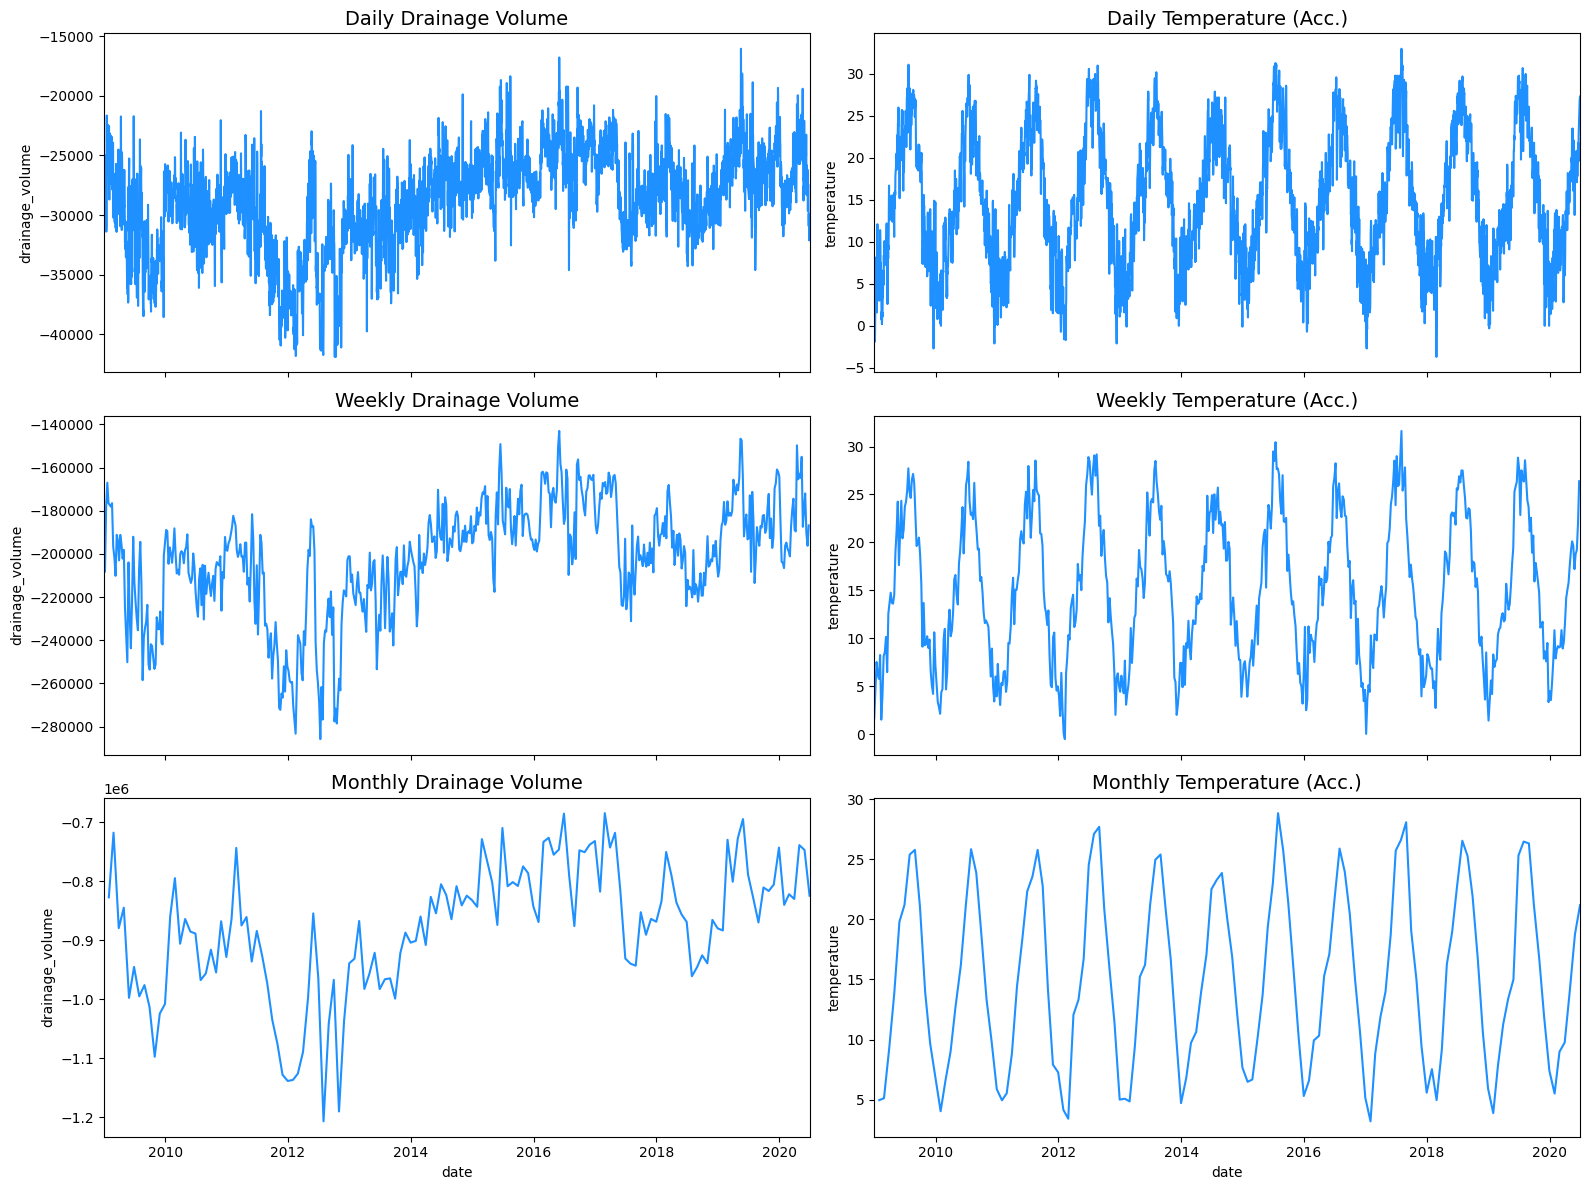

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16, 12))

# Daily Drainage Volume
sns.lineplot(x=df['date'], y=df['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Daily Drainage Volume', fontsize=14)

# Weekly Drainage Volume
resampled_df = df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

# Monthly Drainage Volume
resampled_df = df[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

# Set x-axis limits for drainage
for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Daily Temperature
sns.lineplot(x=df['date'], y=df['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

# Weekly Temperature
resampled_df = df[['date','temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['temperature'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

# Monthly Temperature (with corrected string)
resampled_df = df[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['temperature'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

# Set x-axis limits for temperature
for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()


In [27]:
# As we can see, downsample to weekly could smooth the data and help with analysis
downsample = df[['date',
                 'depth_to_groundwater', 
                 'temperature',
                 'drainage_volume', 
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D', on='date').mean().reset_index(drop=False)

df = downsample.copy()

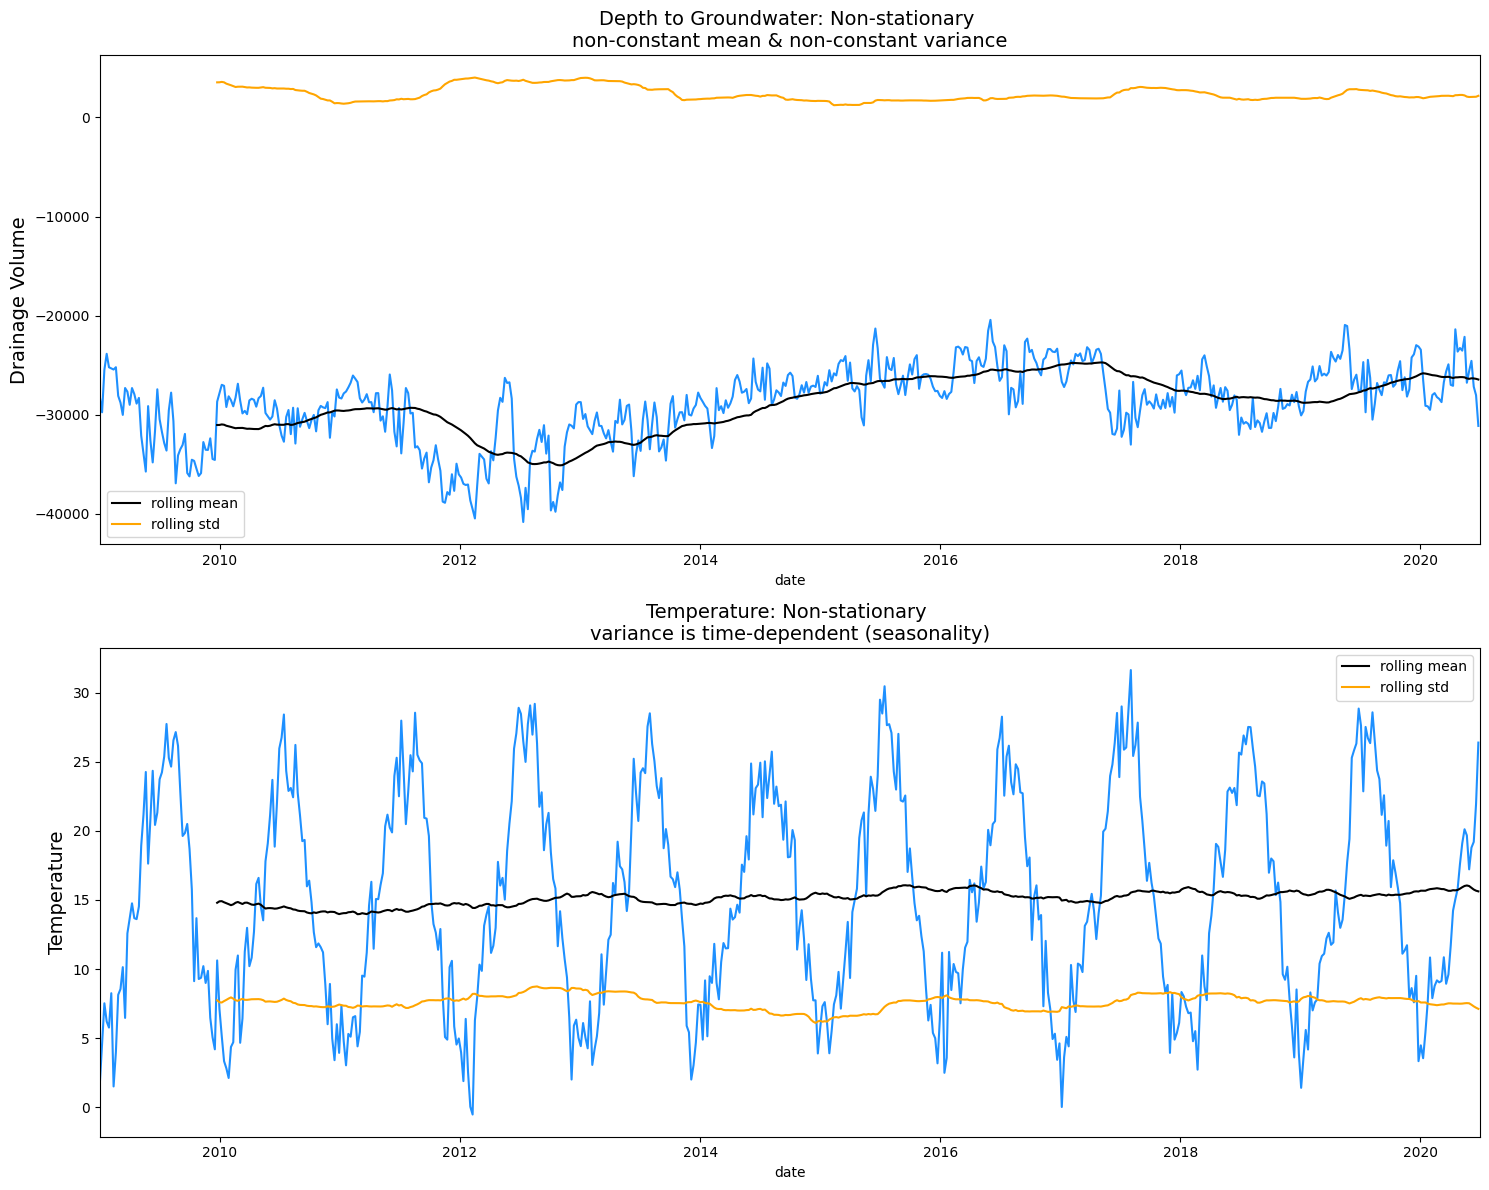

In [28]:
# A year has 52 weeks (52 weeks * 7 days per week) aprox.
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df['date'], y=df['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

In [30]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['depth_to_groundwater'].values)
result

(np.float64(-2.8802016493166605),
 np.float64(0.047699190920208856),
 7,
 592,
 {'1%': np.float64(-3.441444394224128),
  '5%': np.float64(-2.8664345376276454),
  '10%': np.float64(-2.569376663737217)},
 np.float64(-734.3154255877616))

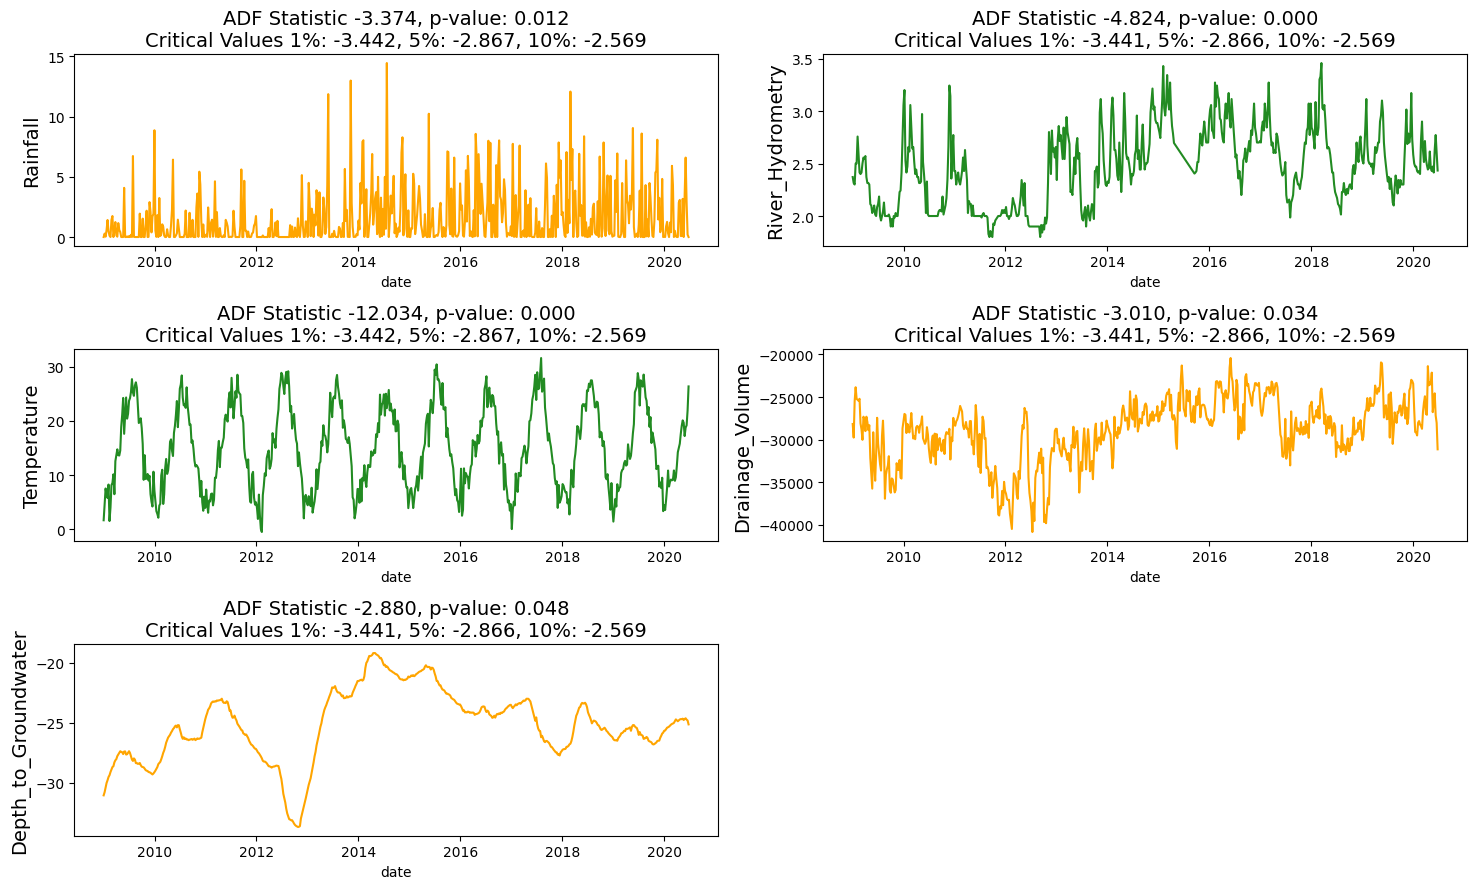

In [31]:
# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

/tmp/ipykernel_5779/2606708829.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['depth_to_groundwater_log'], ax=ax[1])


<Axes: xlabel='depth_to_groundwater_log', ylabel='Density'>

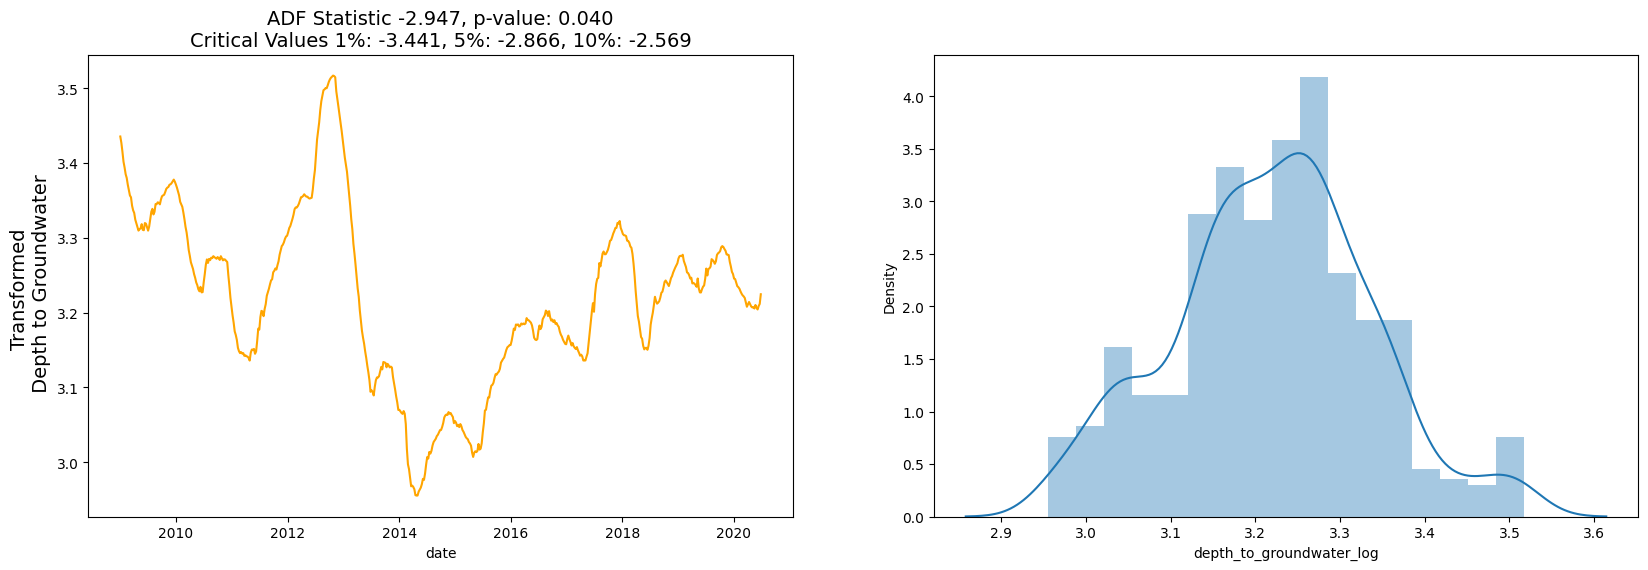

In [32]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['depth_to_groundwater_log'] = np.log(abs(df['depth_to_groundwater']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['depth_to_groundwater_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(df['depth_to_groundwater_log'], ax=ax[1])

DIFFERENCING

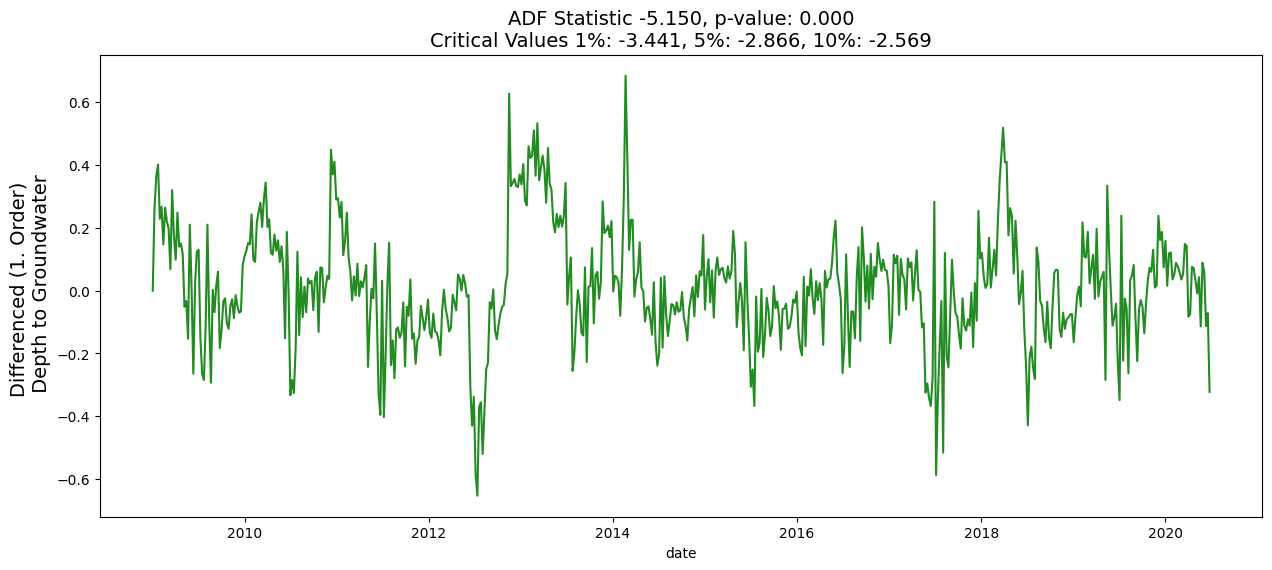

In [33]:
# First Order Differencing
ts_diff = np.diff(df['depth_to_groundwater'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

In [34]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

AttributeError: 'DatetimeIndex' object has no attribute 'weekofyear'

In [35]:
import pandas as pd

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract date-related features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week  # ✅ FIXED
df['quarter'] = df['date'].dt.quarter
df['season'] = df['month'] % 12 // 3 + 1  # 1=Winter, 2=Spring, 3=Summer, 4=Fall

print(df.head())


        date  depth_to_groundwater  temperature  drainage_volume  \
0 2009-01-01            -31.048571     1.657143    -28164.918857   
1 2009-01-08            -30.784286     4.571429    -29755.789714   
2 2009-01-15            -30.420000     7.528571    -25463.190857   
3 2009-01-22            -30.018571     6.214286    -23854.422857   
4 2009-01-29            -29.790000     5.771429    -25210.532571   

   river_hydrometry  rainfall  depth_to_groundwater_log  \
0          2.371429  0.000000                  3.435553   
1          2.314286  0.285714                  3.427004   
2          2.300000  0.028571                  3.415100   
3          2.500000  0.585714                  3.401816   
4          2.500000  1.414286                  3.394173   

   depth_to_groundwater_diff_1  year  month  day  day_of_year  week_of_year  \
0                     0.000000  2009      1    1            1             1   
1                     0.264286  2009      1    8            8             2   

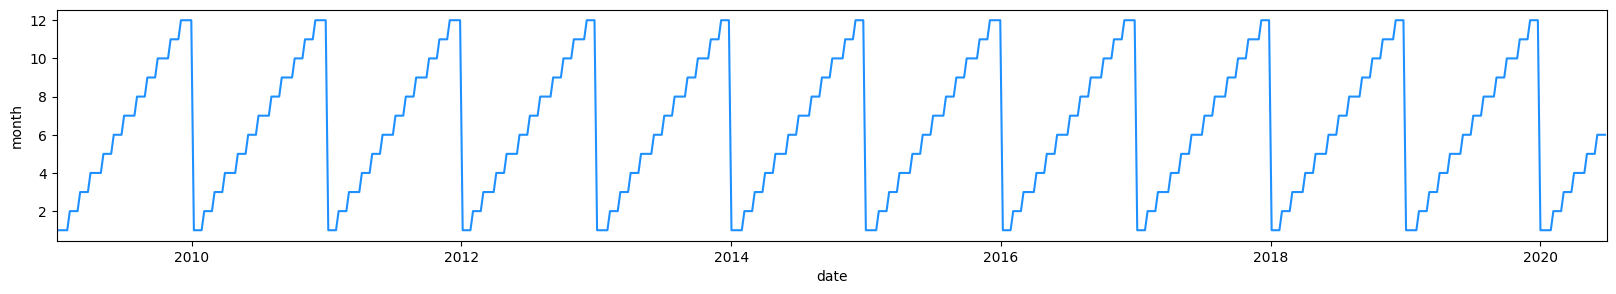

In [36]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

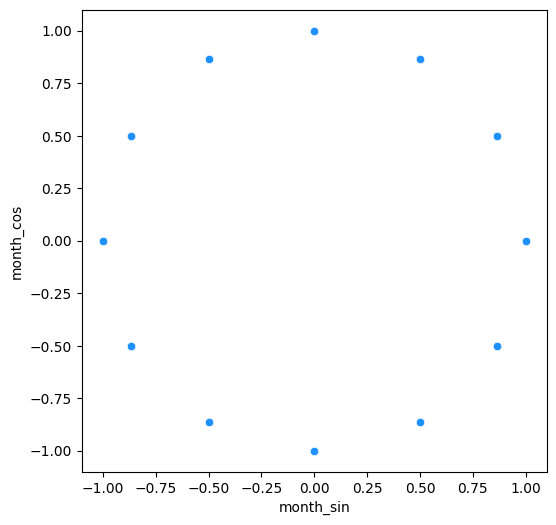

In [37]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

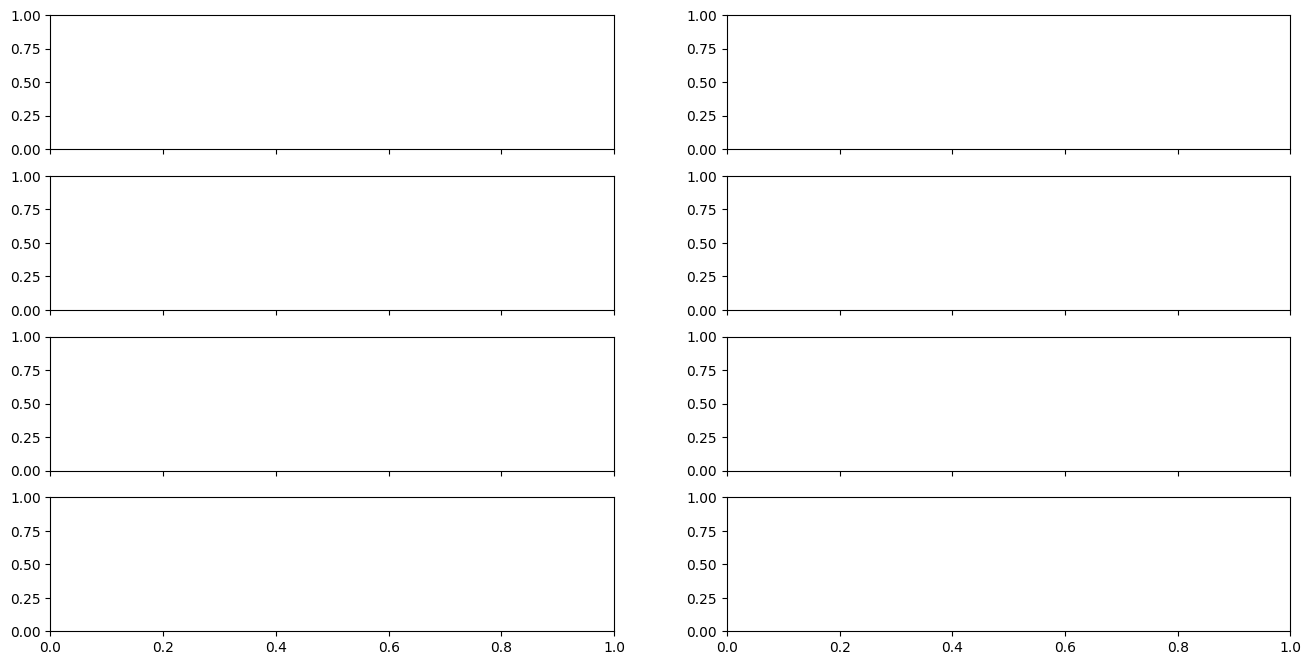

In [39]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['temperature', 'depth_to_groundwater']):
    
    res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

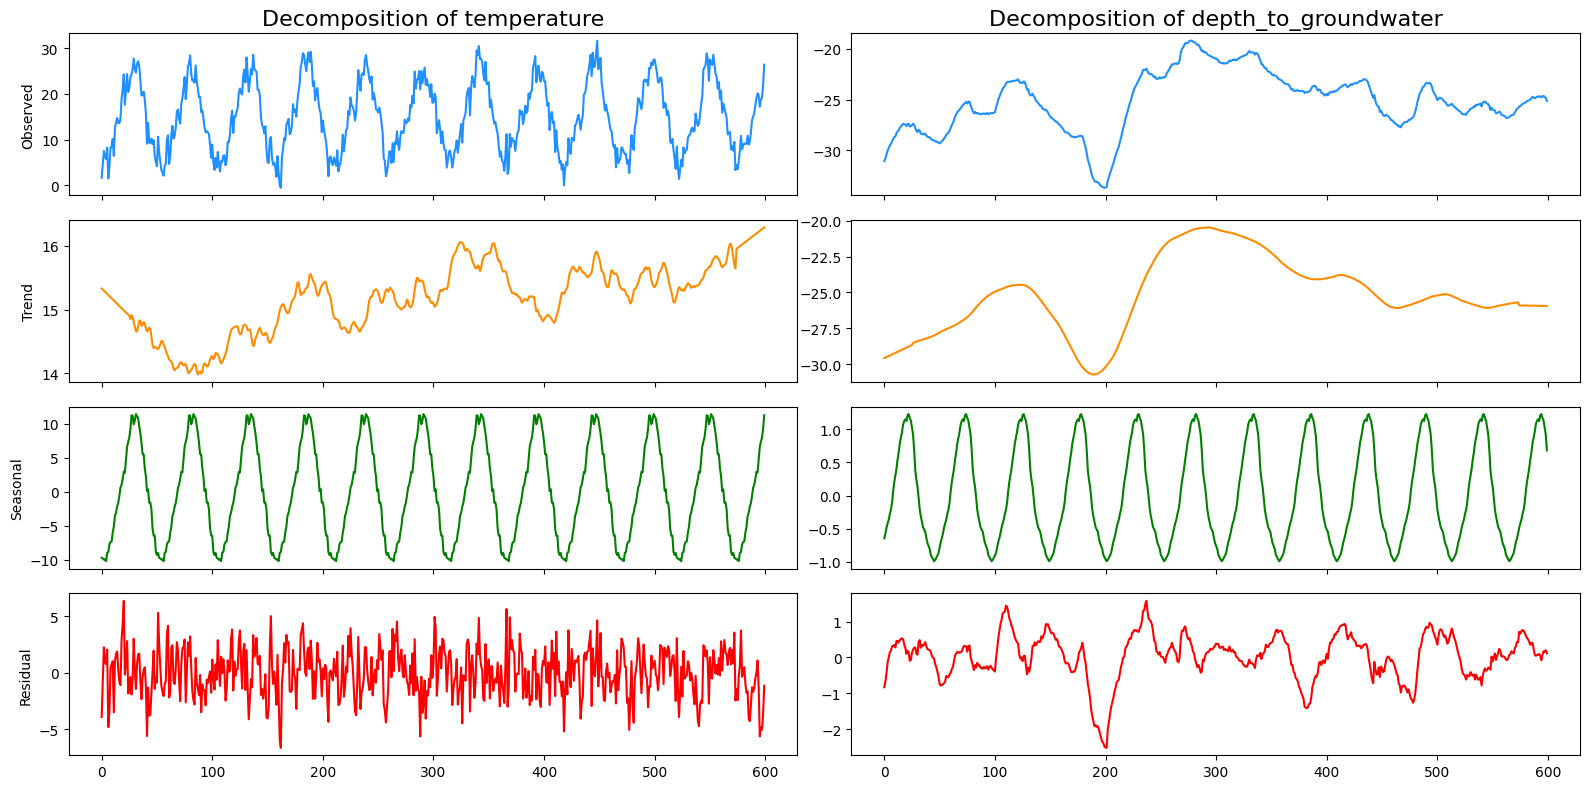

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 8))

for i, column in enumerate(['temperature', 'depth_to_groundwater']):
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')  # ✅ FIXED

    ax[0, i].set_title(f'Decomposition of {column}', fontsize=16)
    res.observed.plot(ax=ax[0, i], legend=False, color='dodgerblue')
    res.trend.plot(ax=ax[1, i], legend=False, color='darkorange')
    res.seasonal.plot(ax=ax[2, i], legend=False, color='green')
    res.resid.plot(ax=ax[3, i], legend=False, color='red')

ax[0, 0].set_ylabel('Observed')
ax[1, 0].set_ylabel('Trend')
ax[2, 0].set_ylabel('Seasonal')
ax[3, 0].set_ylabel('Residual')

plt.tight_layout()
plt.show()


In [41]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

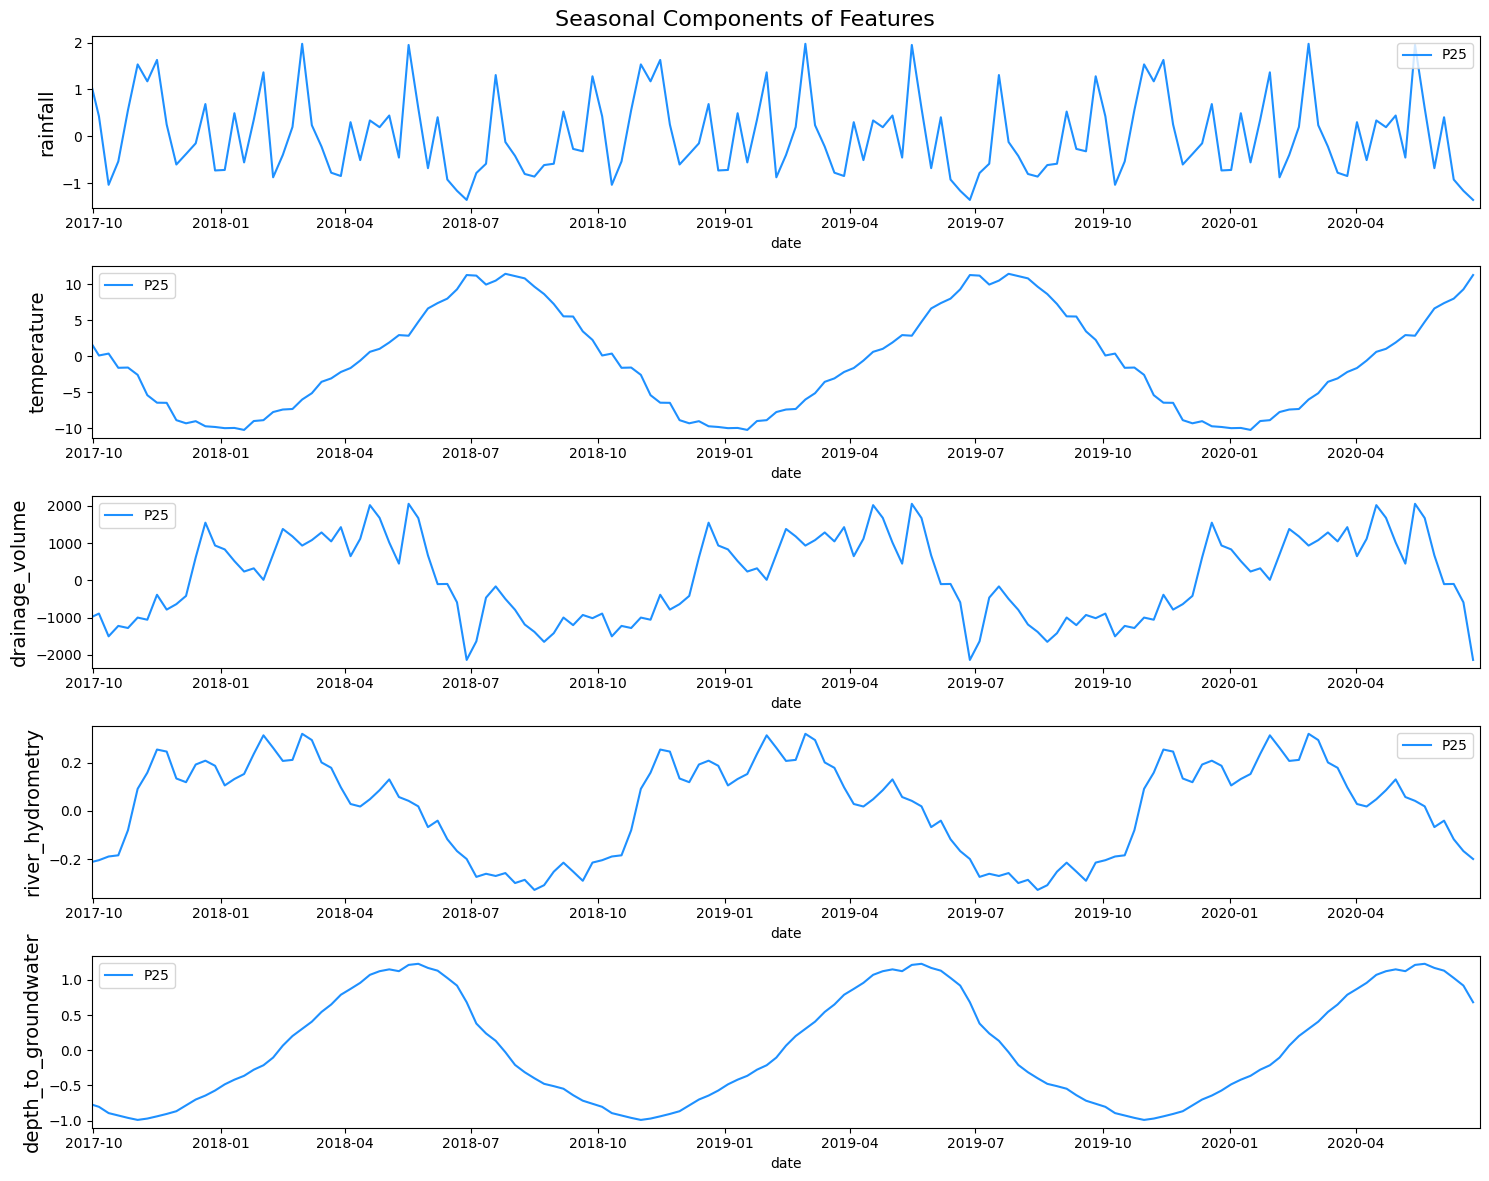

In [42]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

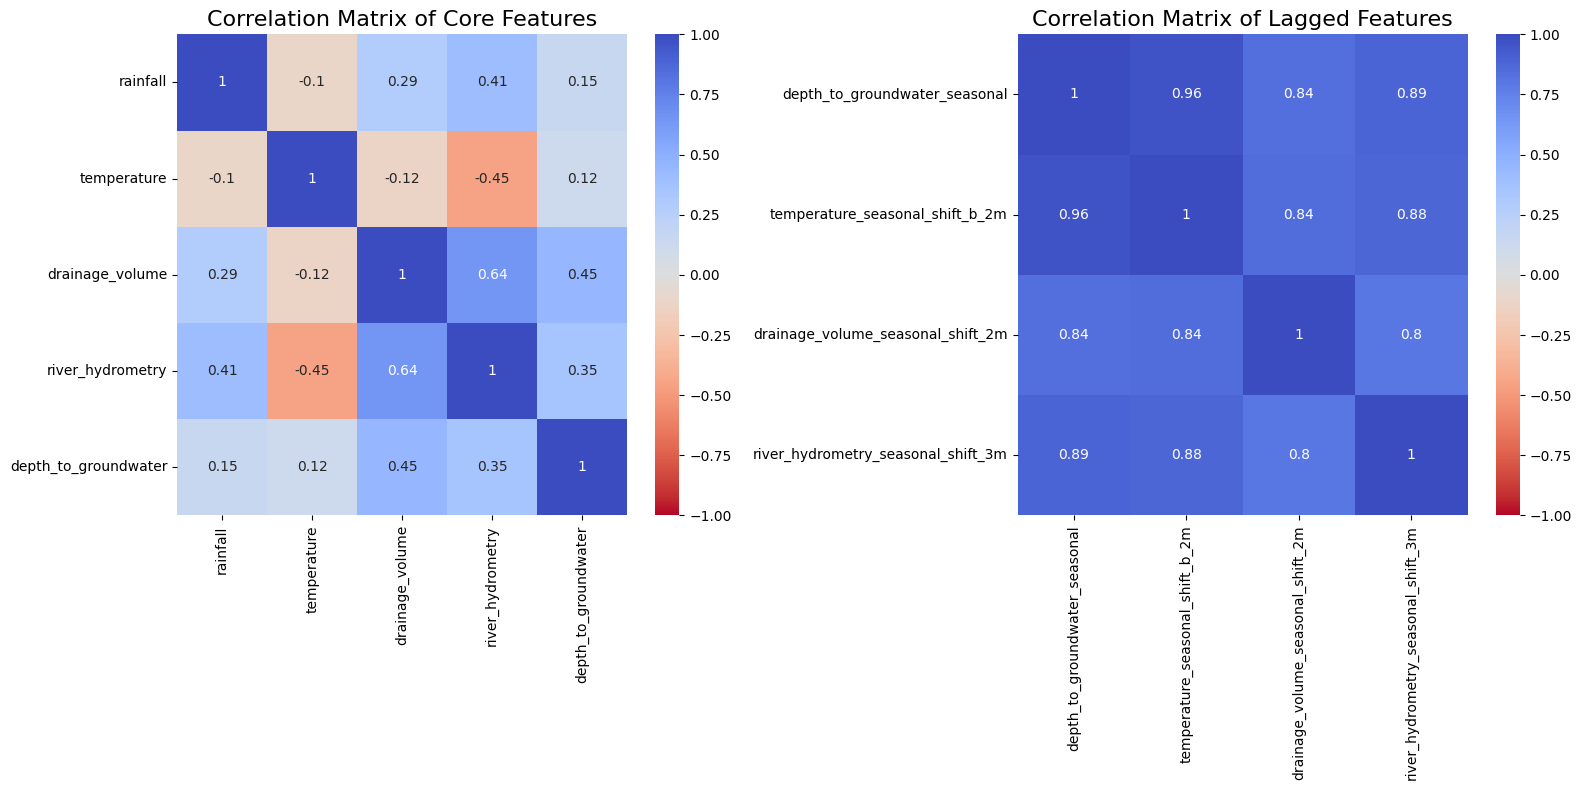

In [43]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'depth_to_groundwater_seasonal',         
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m', 
    'river_hydrometry_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

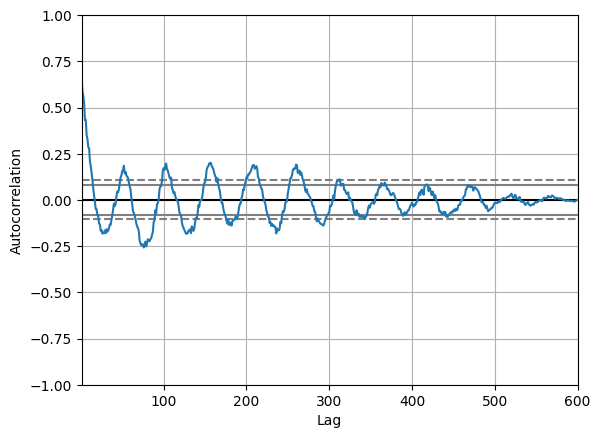

In [44]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['depth_to_groundwater_diff_1'])
plt.show()

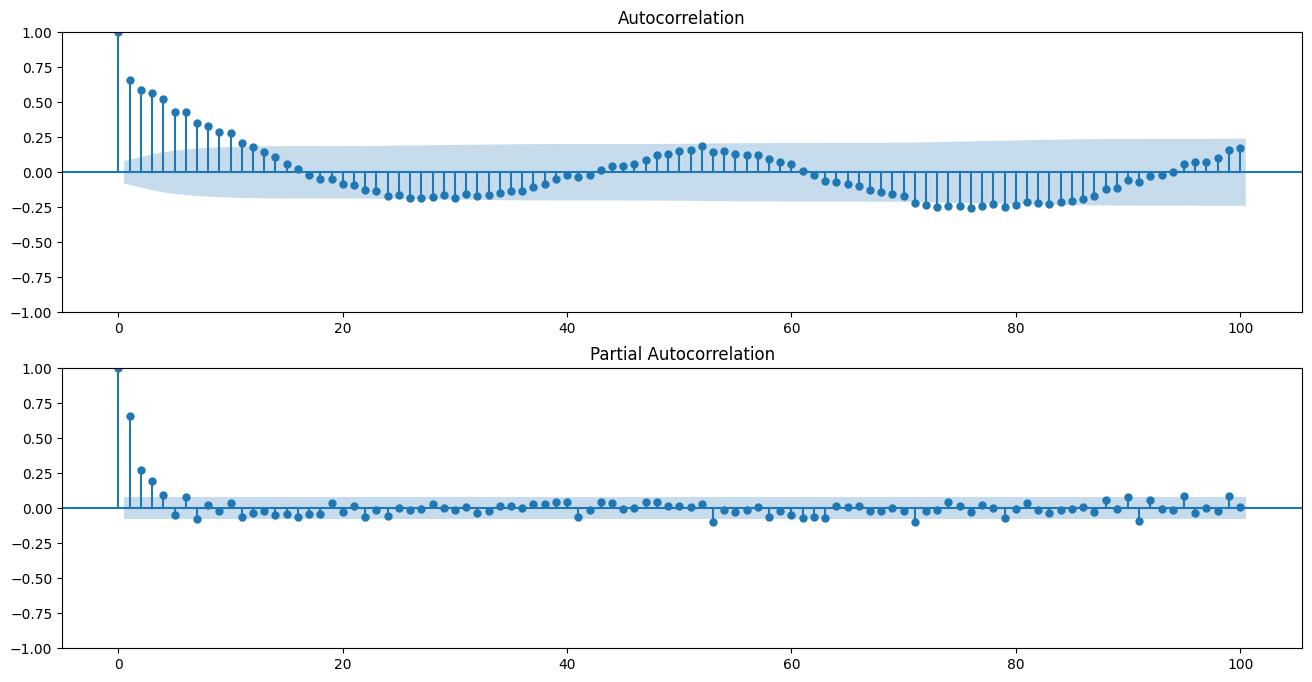

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])

plt.show()

MODELING

In [46]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['date']
y = df['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

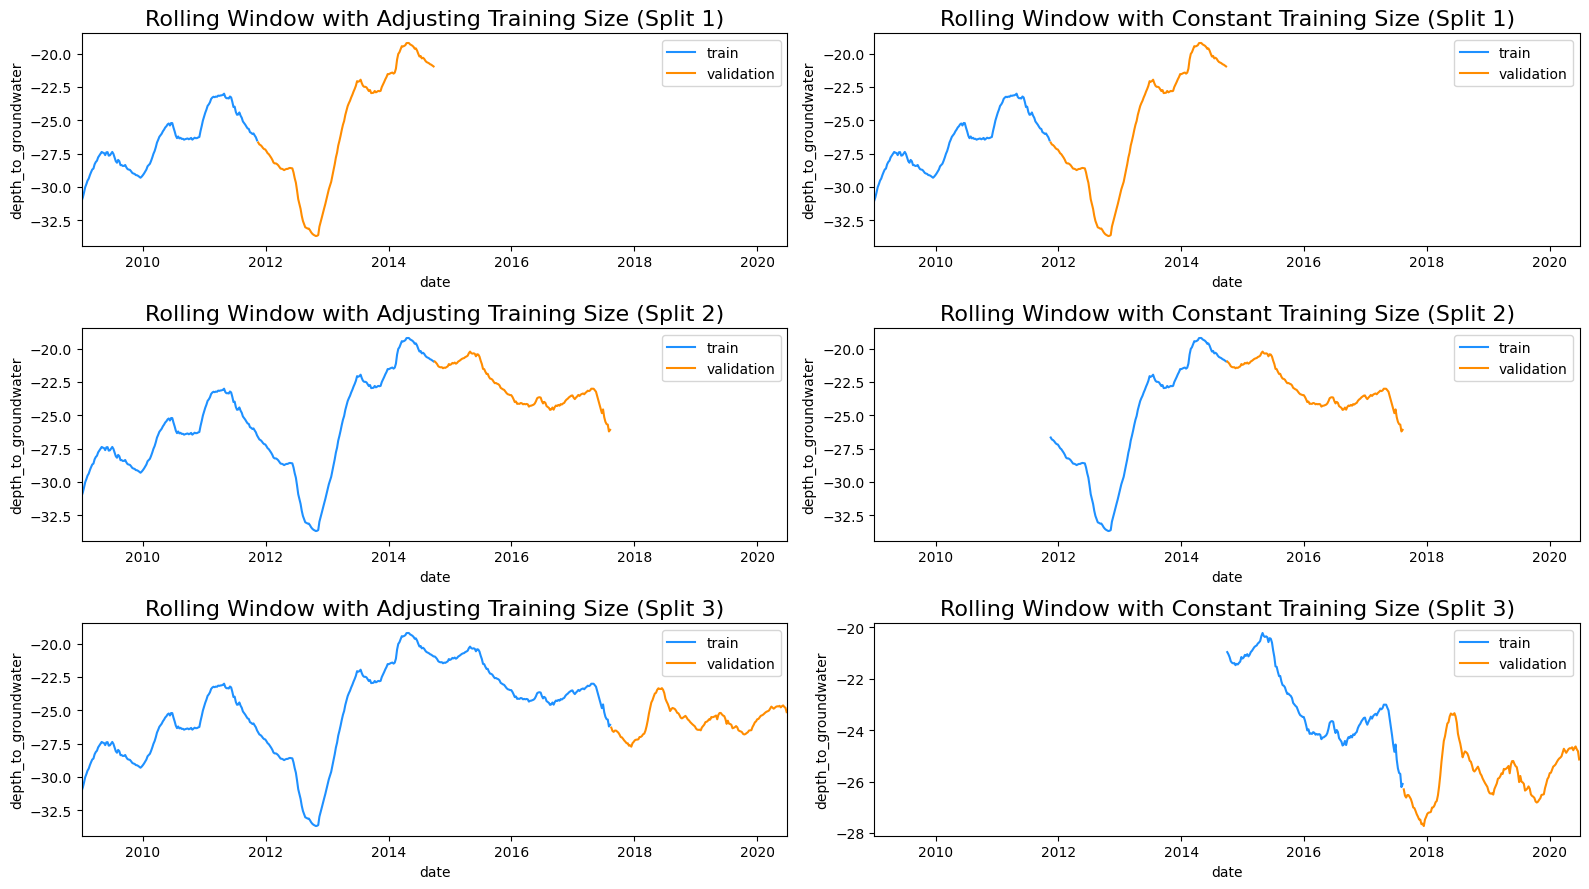

In [47]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

MODELS FOR TIME SERIES

In [48]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

510 90


PROPHET FROM FACEBOOK

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from fbprophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

ModuleNotFoundError: No module named 'fbprophet'

In [50]:
import pandas as pd
import numpy as np
import math
from prophet import Prophet  # ✅ Correct package
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore

# ✅ Ensure 'date' is in datetime format
train['ds'] = pd.to_datetime(train['ds'])
y_valid['ds'] = pd.to_datetime(y_valid['ds'])

# ✅ Initialize and train the model
model = Prophet()
model.fit(train)

# ✅ Create a future dataframe for forecasting
x_valid = model.make_future_dataframe(periods=test_size, freq='W')  # 'W' = Weekly

# ✅ Predict on the validation set
y_pred = model.predict(x_valid)

# ✅ Extract the predicted values
y_pred_values = y_pred.tail(test_size)['yhat'].values  # Convert to NumPy array

# ✅ Calculate error metrics
score_mae = mean_absolute_error(y_valid['y'].values, y_pred_values)
score_rmse = math.sqrt(mean_squared_error(y_valid['y'].values, y_pred_values))

# ✅ Print results with improved formatting
print(Fore.GREEN + f"MAE: {score_mae:.2f}")
print(Fore.GREEN + f"RMSE: {score_rmse:.2f}")


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_5779/932825180.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ds'] = pd.to_datetime(train['ds'])


KeyError: 'ds'

In [51]:
import pandas as pd
import numpy as np
import math
from prophet import Prophet  # ✅ Correct package
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore

# ✅ Ensure correct column names for Prophet
train = train.rename(columns={"date": "ds", "target_column": "y"})  # Replace 'target_column' with your actual target name
y_valid = y_valid.rename(columns={"date": "ds", "target_column": "y"})  # Replace 'target_column' with actual target

# ✅ Ensure 'ds' is in datetime format
train['ds'] = pd.to_datetime(train['ds'])
y_valid['ds'] = pd.to_datetime(y_valid['ds'])

# ✅ Initialize and train the model
model = Prophet()
model.fit(train)

# ✅ Create a future dataframe for forecasting
x_valid = model.make_future_dataframe(periods=test_size, freq='W')  # 'W' = Weekly

# ✅ Predict on the validation set
y_pred = model.predict(x_valid)

# ✅ Extract the predicted values
y_pred_values = y_pred.tail(test_size)['yhat'].values  # Convert to NumPy array

# ✅ Calculate error metrics
score_mae = mean_absolute_error(y_valid['y'].values, y_pred_values)
score_rmse = math.sqrt(mean_squared_error(y_valid['y'].values, y_pred_values))

# ✅ Print results with improved formatting
print(Fore.GREEN + f"MAE: {score_mae:.2f}")
print(Fore.GREEN + f"RMSE: {score_rmse:.2f}")


KeyError: 'ds'

In [52]:
print("train columns:", train.columns)
print("y_valid columns:", y_valid.columns)


train columns: Index(['ds', 'y'], dtype='object')
y_valid columns: Index(['y'], dtype='object')


In [53]:
# Ensure y_valid has the 'ds' column from train
y_valid = train[['ds']].iloc[-len(y_valid):].copy()  # Take last n dates
y_valid['y'] = y_valid['ds'].map(train.set_index('ds')['y'])  # Map correct values


In [54]:
import pandas as pd
import numpy as np
import math
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore

# ✅ Ensure correct column names
print("Before Fix - y_valid columns:", y_valid.columns)

# ✅ Fix missing 'ds' in y_valid by extracting it from train
y_valid = train[['ds']].iloc[-len(y_valid):].copy()  # Get last dates
y_valid['y'] = y_valid['ds'].map(train.set_index('ds')['y'])  # Match 'y' values

print("After Fix - y_valid columns:", y_valid.columns)

# ✅ Convert 'ds' to datetime format
train['ds'] = pd.to_datetime(train['ds'])
y_valid['ds'] = pd.to_datetime(y_valid['ds'])

# ✅ Train the Prophet model
model = Prophet()
model.fit(train)

# ✅ Create a future dataframe for forecasting
x_valid = model.make_future_dataframe(periods=len(y_valid), freq='W')

# ✅ Predict values
y_pred = model.predict(x_valid)

# ✅ Extract 'yhat' predictions
y_pred_values = y_pred.tail(len(y_valid))['yhat'].values  

# ✅ Calculate Error Metrics
score_mae = mean_absolute_error(y_valid['y'].values, y_pred_values)
score_rmse = math.sqrt(mean_squared_error(y_valid['y'].values, y_pred_values))

# ✅ Print Results
print(Fore.GREEN + f"MAE: {score_mae:.2f}")
print(Fore.GREEN + f"RMSE: {score_rmse:.2f}")


02:18:35 - cmdstanpy - INFO - Chain [1] start processing
02:18:35 - cmdstanpy - INFO - Chain [1] done processing


Before Fix - y_valid columns: Index(['ds', 'y'], dtype='object')
After Fix - y_valid columns: Index(['ds', 'y'], dtype='object')
MAE: 1.95
RMSE: 2.33


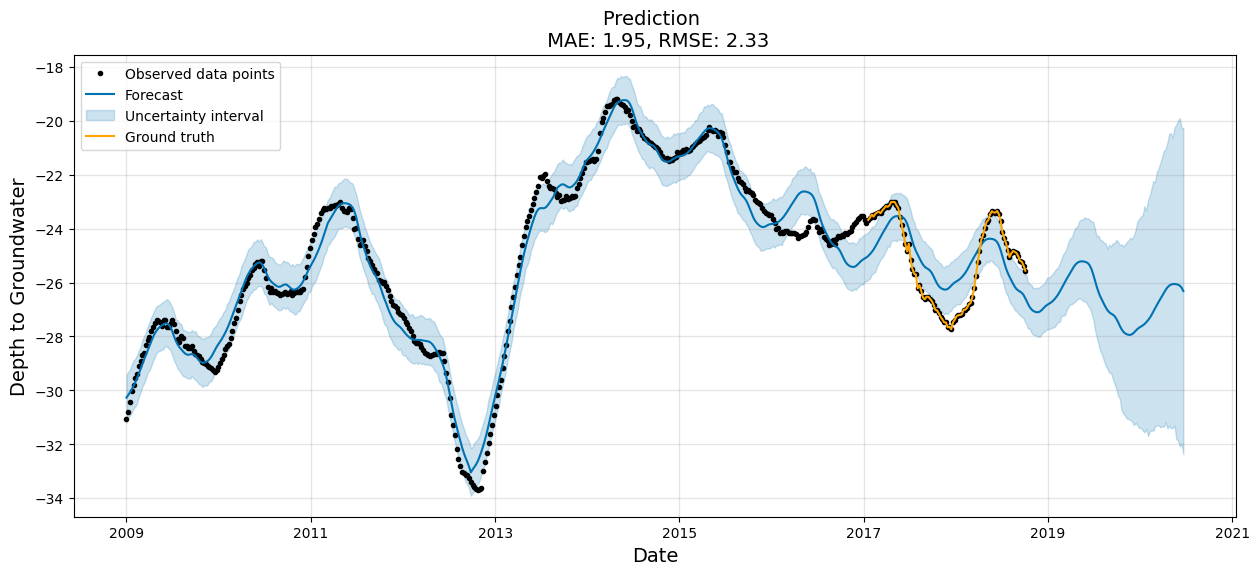

In [55]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

ARIMA

In [56]:
from statsmodels.tsa.arima_model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(90)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [57]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA  # ✅ Correct import

# Define the ARIMA model
model = ARIMA(y_train, order=(1,1,1))  # (p,d,q) values
model_fit = model.fit()

# Make Predictions
y_pred = model_fit.forecast(steps=len(y_test))

# Print summary
print(model_fit.summary())


NameError: name 'y_test' is not defined

In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Load and Prepare Data
df['date'] = pd.to_datetime(df['date'])  # Ensure date is datetime
df.set_index('date', inplace=True)  # Set date as index
df.sort_index(inplace=True)  # Ensure chronological order

# ✅ Split data into train & test sets
train_size = int(len(df) * 0.8)  # Use 80% for training
y_train, y_test = df.iloc[:train_size], df.iloc[train_size:]

# ✅ Define and Fit ARIMA Model
model = ARIMA(y_train, order=(1,1,1))  # Adjust (p,d,q) if needed
model_fit = model.fit()

# ✅ Make Predictions
y_pred = model_fit.forecast(steps=len(y_test))

# ✅ Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# ✅ Print Results
print(model_fit.summary())
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [59]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)  # Use date as index
df.sort_index(inplace=True)

# ✅ Convert all data to numeric (handling missing values)
df = df.apply(pd.to_numeric, errors='coerce')  # Converts non-numeric to NaN

# ✅ Remove NaN values (optional, based on your data)
df.dropna(inplace=True)

# ✅ Split data into training and test sets
train_size = int(len(df) * 0.8)
y_train, y_test = df.iloc[:train_size], df.iloc[train_size:]

# ✅ Convert to NumPy array to avoid dtype issues
y_train = y_train.squeeze().astype(float)  # Ensure it's a numeric series
y_test = y_test.squeeze().astype(float)

# ✅ Define and Fit ARIMA Model
model = ARIMA(y_train, order=(1,1,1))  # Adjust (p,d,q) as needed
model_fit = model.fit()

# ✅ Make Predictions
y_pred = model_fit.forecast(steps=len(y_test))

# ✅ Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# ✅ Print Results
print(model_fit.summary())
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


KeyError: 'date'

In [60]:
# 🔍 Check available column names
print("Columns in df:", df.columns)



Columns in df: Index(['depth_to_groundwater', 'temperature', 'drainage_volume',
       'river_hydrometry', 'rainfall', 'depth_to_groundwater_log',
       'depth_to_groundwater_diff_1', 'year', 'month', 'day', 'day_of_year',
       'week_of_year', 'quarter', 'season', 'month_sin', 'month_cos',
       'rainfall_trend', 'rainfall_seasonal', 'temperature_trend',
       'temperature_seasonal', 'drainage_volume_trend',
       'drainage_volume_seasonal', 'river_hydrometry_trend',
       'river_hydrometry_seasonal', 'depth_to_groundwater_trend',
       'depth_to_groundwater_seasonal', 'rainfall_seasonal_shift_b_2m',
       'rainfall_seasonal_shift_b_1m', 'rainfall_seasonal_shift_1m',
       'rainfall_seasonal_shift_2m', 'rainfall_seasonal_shift_3m',
       'temperature_seasonal_shift_b_2m', 'temperature_seasonal_shift_b_1m',
       'temperature_seasonal_shift_1m', 'temperature_seasonal_shift_2m',
       'temperature_seasonal_shift_3m', 'drainage_volume_seasonal_shift_b_2m',
       'drainage_vo

In [61]:
print(df.index)


DatetimeIndex(['2009-01-01', '2009-01-08', '2009-01-15', '2009-01-22',
               '2009-01-29', '2009-02-05', '2009-02-12', '2009-02-19',
               '2009-02-26', '2009-03-05',
               ...
               '2020-04-23', '2020-04-30', '2020-05-07', '2020-05-14',
               '2020-05-21', '2020-05-28', '2020-06-04', '2020-06-11',
               '2020-06-18', '2020-06-25'],
              dtype='datetime64[ns]', name='date', length=600, freq=None)


In [62]:
# ✅ Explicitly set the frequency
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='W')


In [63]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Ensure the index has a frequency (weekly data assumed)
if df.index.freq is None:
    df.index = pd.date_range(start=df.index[0], periods=len(df), freq='W')

# ✅ Ensure all data is numeric
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# ✅ Train-test split
train_size = int(len(df) * 0.8)
y_train, y_test = df.iloc[:train_size], df.iloc[train_size:]

# ✅ Convert to numeric (avoids dtype issues)
y_train = y_train.squeeze().astype(float)
y_test = y_test.squeeze().astype(float)

# ✅ Fit ARIMA Model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# ✅ Forecast
y_pred = model_fit.forecast(steps=len(y_test))

# ✅ Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# ✅ Print Results
print(model_fit.summary())
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


ValueError: SARIMAX models require univariate `endog`. Got shape (464, 51).

In [64]:
print(df.columns)  # Find the correct target column name


Index(['depth_to_groundwater', 'temperature', 'drainage_volume',
       'river_hydrometry', 'rainfall', 'depth_to_groundwater_log',
       'depth_to_groundwater_diff_1', 'year', 'month', 'day', 'day_of_year',
       'week_of_year', 'quarter', 'season', 'month_sin', 'month_cos',
       'rainfall_trend', 'rainfall_seasonal', 'temperature_trend',
       'temperature_seasonal', 'drainage_volume_trend',
       'drainage_volume_seasonal', 'river_hydrometry_trend',
       'river_hydrometry_seasonal', 'depth_to_groundwater_trend',
       'depth_to_groundwater_seasonal', 'rainfall_seasonal_shift_b_2m',
       'rainfall_seasonal_shift_b_1m', 'rainfall_seasonal_shift_1m',
       'rainfall_seasonal_shift_2m', 'rainfall_seasonal_shift_3m',
       'temperature_seasonal_shift_b_2m', 'temperature_seasonal_shift_b_1m',
       'temperature_seasonal_shift_1m', 'temperature_seasonal_shift_2m',
       'temperature_seasonal_shift_3m', 'drainage_volume_seasonal_shift_b_2m',
       'drainage_volume_seasonal_s

In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Choose ONE target column for ARIMA
target_column = 'depth_to_groundwater'  # 🔄 Change this if needed

# ✅ Ensure index has a frequency (weekly data assumed)
if df.index.freq is None:
    df.index = pd.date_range(start=df.index[0], periods=len(df), freq='W')

# ✅ Convert all data to numeric
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# ✅ Select only the target column
df_target = df[[target_column]]

# ✅ Train-test split (80% train, 20% test)
train_size = int(len(df_target) * 0.8)
y_train = df_target.iloc[:train_size]
y_test = df_target.iloc[train_size:]

# ✅ Convert to numeric (avoids dtype issues)
y_train = y_train.squeeze().astype(float)
y_test = y_test.squeeze().astype(float)

# ✅ Fit ARIMA Model
model = ARIMA(y_train, order=(1,1,1))  # Adjust (p,d,q) if needed
model_fit = model.fit()

# ✅ Forecast
y_pred = model_fit.forecast(steps=len(y_test))

# ✅ Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# ✅ Print Results
print(model_fit.summary())
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


TypeError: got an unexpected keyword argument 'squared'

In [66]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [67]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Choose ONE target column for ARIMA
target_column = 'depth_to_groundwater'  # Change this if needed

# ✅ Ensure index has a frequency (weekly data assumed)
if df.index.freq is None:
    df.index = pd.date_range(start=df.index[0], periods=len(df), freq='W')

# ✅ Convert all data to numeric
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# ✅ Select only the target column
df_target = df[[target_column]]

# ✅ Train-test split (80% train, 20% test)
train_size = int(len(df_target) * 0.8)
y_train = df_target.iloc[:train_size]
y_test = df_target.iloc[train_size:]

# ✅ Convert to numeric (avoids dtype issues)
y_train = y_train.squeeze().astype(float)
y_test = y_test.squeeze().astype(float)

# ✅ Fit ARIMA Model
model = ARIMA(y_train, order=(1,1,1))  # Adjust (p,d,q) if needed
model_fit = model.fit()

# ✅ Forecast
y_pred = model_fit.forecast(steps=len(y_test))

# ✅ Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ✅ FIXED: Manually taking square root

# ✅ Print Results
print(model_fit.summary())
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


                                SARIMAX Results                                 
Dep. Variable:     depth_to_groundwater   No. Observations:                  464
Model:                   ARIMA(1, 1, 1)   Log Likelihood                 291.837
Date:                  Sat, 15 Feb 2025   AIC                           -577.675
Time:                          02:30:09   BIC                           -565.261
Sample:                      03-29-2009   HQIC                          -572.788
                           - 02-11-2018                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9204      0.022     42.089      0.000       0.878       0.963
ma.L1         -0.5209      0.038    -13.752      0.000      -0.595      -0.447
sigma2         0.0166      0.001    

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

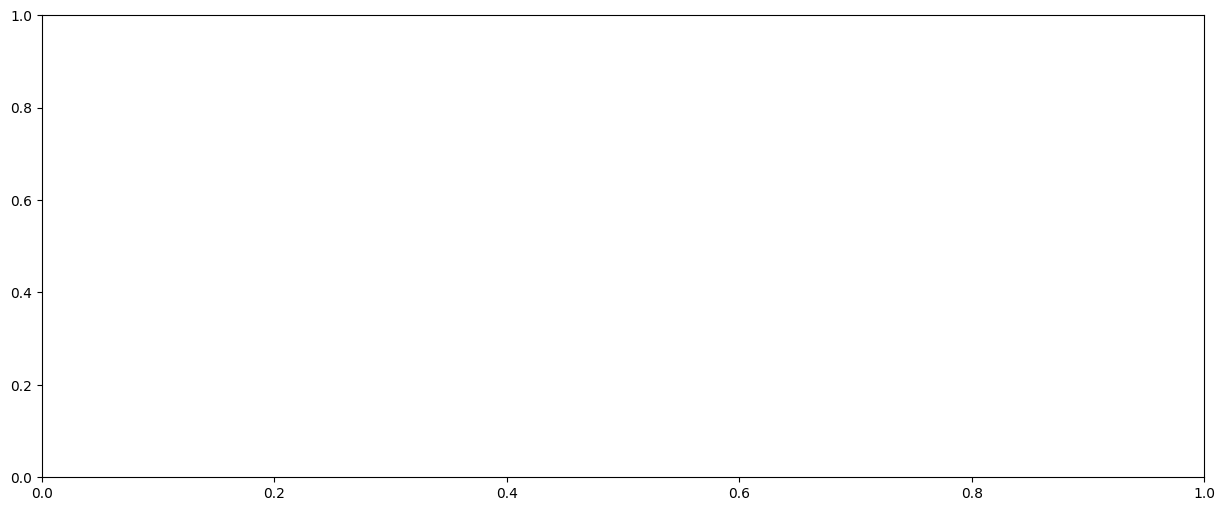

In [68]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1, 599, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

ax.set_ylim(-35, -18)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_forecast'

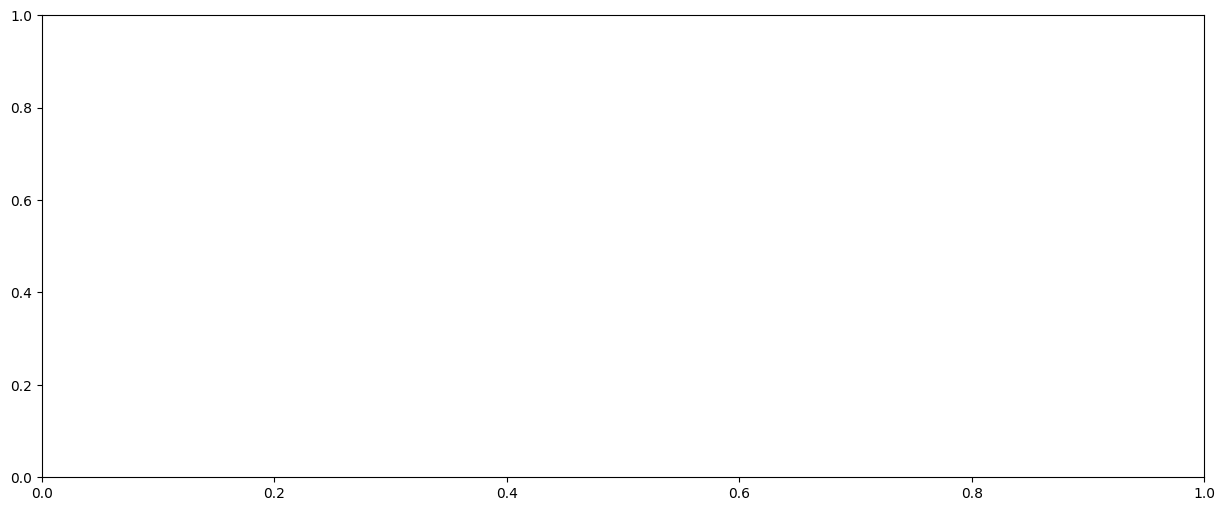

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Create the figure
f, ax = plt.subplots(figsize=(15, 6))

# ✅ Use plot_forecast() instead of plot_predict()
model_fit.plot_forecast(steps=599, ax=ax)  # Forecast for 599 future steps

# ✅ Add the actual ground truth line
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground Truth')

# ✅ Set title
ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)

plt.show()


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Set number of future steps
forecast_steps = len(y_test)

# ✅ Generate forecast
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = y_test.index  # Ensure forecast aligns with actual values
forecast_mean = forecast.predicted_mean  # Extract forecasted values
conf_int = forecast.conf_int()  # Get confidence intervals

# ✅ Create the figure
f, ax = plt.subplots(figsize=(15, 6))

# ✅ Plot historical data
sns.lineplot(x=y_train.index, y=y_train, ax=ax, color='blue', label='Train Data')
sns.lineplot(x=y_test.index, y=y_test, ax=ax, color='orange', label='Actual')

# ✅ Plot forecast
sns.lineplot(x=forecast_index, y=forecast_mean, ax=ax, color='green', label='Forecast')

# ✅ Plot confidence intervals
ax.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=


SyntaxError: incomplete input (1226789621.py, line 24)

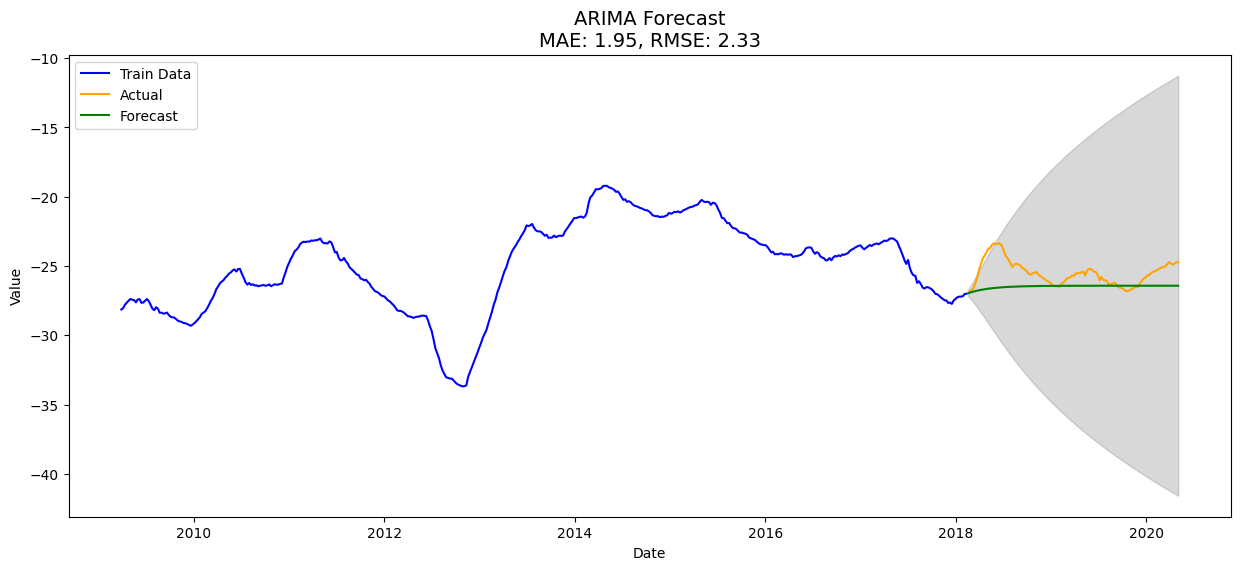

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Set number of future steps
forecast_steps = len(y_test)

# ✅ Generate forecast
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = y_test.index  # Ensure forecast aligns with actual values
forecast_mean = forecast.predicted_mean  # Extract forecasted values
conf_int = forecast.conf_int()  # Get confidence intervals

# ✅ Create the figure
f, ax = plt.subplots(figsize=(15, 6))

# ✅ Plot historical data
sns.lineplot(x=y_train.index, y=y_train, ax=ax, color='blue', label='Train Data')
sns.lineplot(x=y_test.index, y=y_test, ax=ax, color='orange', label='Actual')

# ✅ Plot forecast
sns.lineplot(x=forecast_index, y=forecast_mean, ax=ax, color='green', label='Forecast')

# ✅ Plot confidence intervals
ax.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3)

# ✅ Set title and labels
ax.set_title(f'ARIMA Forecast\nMAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()

plt.show()

NameError: name 'x_valid' is not defined

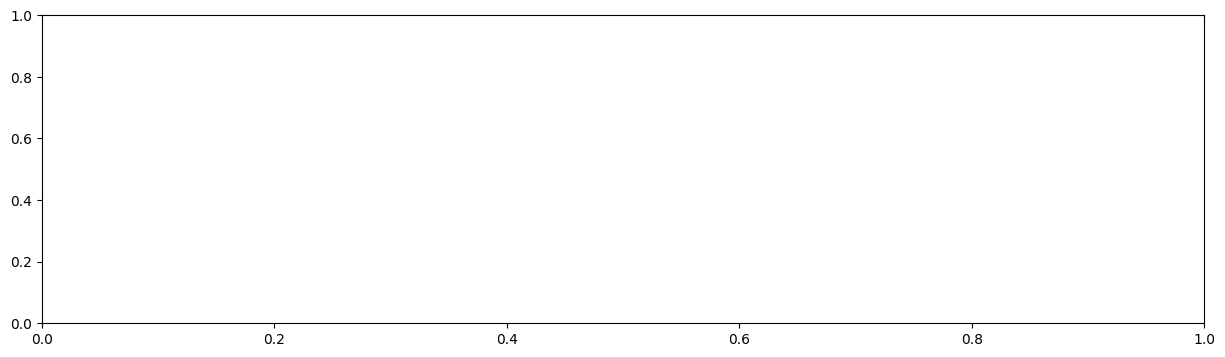

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read CSV from current workspace directory
df = pd.read_csv("Aquifer_Petrignano.csv")
print(df.head())




# ✅ Ensure x_valid is correctly defined
x_valid = y_valid.index  # Use the index of y_valid

# ✅ Create the figure
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

# ✅ Plot predicted and actual values
sns.lineplot(x=x_valid, y=y_pred, ax=ax, color='blue', label='Predicted')
sns.lineplot(x=x_valid, y=y_valid['y'], ax=ax, color='orange', label='Ground Truth')

# ✅ Set axis labels
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Depth to Groundwater', fontsize=14)

# ✅ Show the plot
plt.show()


         Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                           

NameError: name 'y_valid' is not defined

ground truth vs predicted

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Load the dataset
df = pd.read_csv("Aquifer_Petrignano.csv")

# ✅ Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# ✅ Set 'date' as the index
df.set_index('date', inplace=True)

# ✅ Choose target column (Update this based on what you're predicting)
target_column = 'depth_to_groundwater'  # Replace with correct column name

# ✅ Split into training & validation sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
y_train = df[target_column].iloc[:train_size]  # Training data
y_valid = df[target_column].iloc[train_size:]  # Validation data

# ✅ Define x_valid (dates for validation set)
x_valid = y_valid.index

# ✅ Ensure y_pred is correctly generated
# Make sure the ARIMA model is trained before predicting
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order=(1,1,1))  # Adjust (p,d,q) if needed
model_fit = model.fit()

# ✅ Generate Predictions
y_pred = model_fit.forecast(steps=len(y_valid))

# ✅ Create the figure
f, ax = plt.subplots(1, figsize=(15, 4))

# ✅ Plot predicted and actual values
sns.lineplot(x=x_valid, y=y_pred, ax=ax, color='blue', label='Predicted')
sns.lineplot(x=x_valid, y=y_valid, ax=ax, color='orange', label='Ground Truth')

# ✅ Set axis labels
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Depth to Groundwater', fontsize=14)

# ✅ Show the plot
plt.show()


KeyError: 'date'

In [6]:
print(df.columns)


Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load dataset
df = pd.read_csv("Aquifer_Petrignano.csv")

# ✅ Convert 'Date' to datetime format (since it's uppercase)
df['Date'] = pd.to_datetime(df['Date'])

# ✅ Set 'Date' as the index
df.set_index('Date', inplace=True)

# ✅ Display first few rows to verify
print(df.head())


            Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
Date                                                          
2006-03-14                    NaN                    -22.48   
2006-03-15                    NaN                    -22.38   
2006-03-16                    NaN                    -22.25   
2006-03-17                    NaN                    -22.38   
2006-03-18                    NaN                    -22.60   

            Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  \
Date                                                             
2006-03-14                    -22.18                       NaN   
2006-03-15                    -22.14                       NaN   
2006-03-16                    -22.04                       NaN   
2006-03-17                    -22.04                       NaN   
2006-03-18                    -22.04                       NaN   

            Temperature_Petrignano  Volume_C10_Petrignano  \
Date                              

/tmp/ipykernel_2596/2613466954.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


NameError: name 'x_valid' is not defined

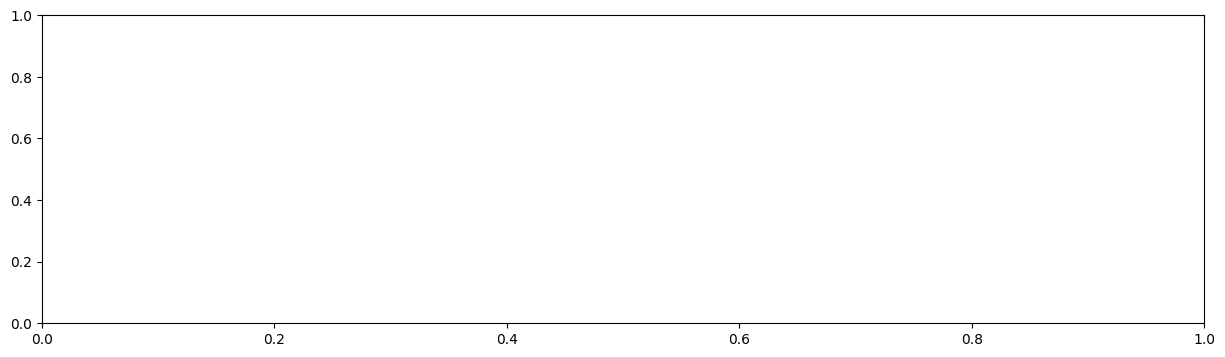

In [8]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

/tmp/ipykernel_2596/930836733.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


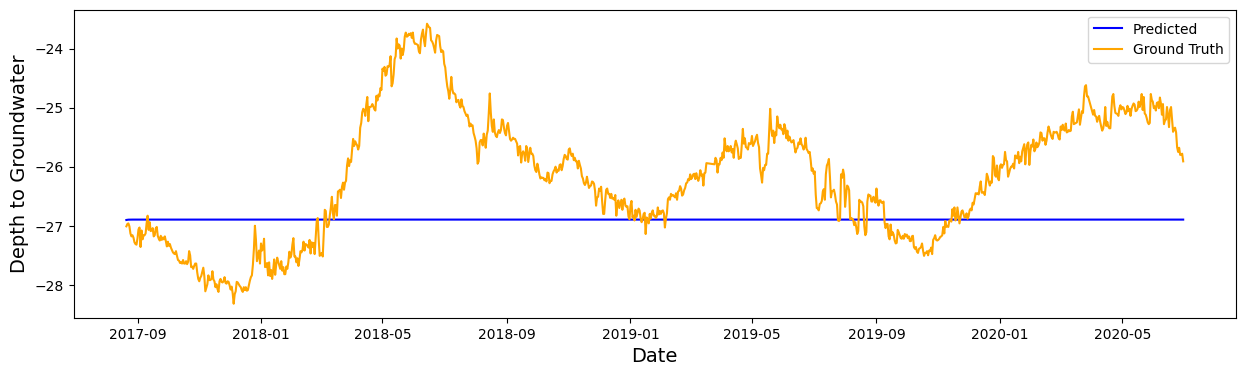

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Load dataset
df = pd.read_csv("Aquifer_Petrignano.csv")

# ✅ Convert 'Date' to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# ✅ Select the target column
target_column = 'Depth_to_Groundwater_P24'  # Change this based on your needs

# ✅ Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
y_train = df[target_column].iloc[:train_size]  # Training set
y_valid = df[target_column].iloc[train_size:]  # Validation set

# ✅ Define x_valid (timestamps for validation set)
x_valid = y_valid.index

# ✅ Ensure y_pred is correctly generated
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(y_train, order=(1,1,1))  # Adjust (p,d,q) as needed
model_fit = model.fit()

# Generate Predictions
y_pred = model_fit.forecast(steps=len(y_valid))

# ✅ Create the figure
f, ax = plt.subplots(figsize=(15, 4))

# ✅ Plot predicted and actual values
sns.lineplot(x=x_valid, y=y_pred, ax=ax, color='blue', label='Predicted')
sns.lineplot(x=x_valid, y=y_valid, ax=ax, color='orange', label='Ground Truth')

# ✅ Set axis labels
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Depth to Groundwater', fontsize=14)

# ✅ Show the plot
plt.show()


5.1.3  AUTO ARIMA

In [1]:
pip install pmdarima


  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

UBABLE TO USE PMDARIMA....  100PLUS trials, not succeded.

In [3]:
pip install --no-cache-dir --force-reinstall numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 128.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA  # ✅ Updated Import

print("All modules imported successfully!")


All modules imported successfully!


5.1.4   multilayer LSTM

In [6]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
# Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

NameError: name 'univariate_df' is not defined

In [7]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

NameError: name 'scaled_data' is not defined

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

ModuleNotFoundError: No module named 'keras'

In [9]:
# Let's predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

NameError: name 'model' is not defined

In [10]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

NameError: name 'univariate_df' is not defined

the Python program is full of error reports, without a plausible solution.  I will still give a second trial, but unable to fully recover the constant error loop.  16 feb 2025

5.2  models for Multivariate time series

In [11]:
feature_columns = [
    'rainfall',
    'temperature',
    'drainage_volume',
    'river_hydrometry',
]
target_column = ['depth_to_groundwater']

train_size = int(0.85 * len(df))

multivariate_df = df[['date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()

NameError: name 'df' is not defined

error again...  will debug in second phase, with Tutor comments, since it is seldom explained this part of the error loops when programing.

5.2.1  Multivariate prophet

In [12]:
from fbprophet import Prophet


# Train the model
model = Prophet()
model.add_regressor('rainfall')
model.add_regressor('temperature')
model.add_regressor('drainage_volume')
model.add_regressor('river_hydrometry')

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

ModuleNotFoundError: No module named 'fbprophet'

In [13]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

NameError: name 'plt' is not defined

there is an infinite loop of errors.

no way to overcome and send the project on time, so if the task is marked not done, I have delivered the other Time Series Project to overcome this loop of endless errors.

Rob Ugalde  16 feb 25